In [2]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import requests
from datetime import date, timedelta, datetime
import time
import os
import json
from pathlib import Path
import glob
import seaborn as sns
from prophet import Prophet
from matplotlib import pyplot as plt

In [3]:


ruta_principal = './CC/'

# Inicializar una lista para almacenar los DataFrames individuales
lista_dataframes = []

# Iterar sobre las carpetas de años
for year_folder in os.listdir(ruta_principal):
    year_path = os.path.join(ruta_principal, year_folder)

    # Verificar que sea un directorio (ignorar archivos sueltos)
    if os.path.isdir(year_path):
        # Iterar sobre las carpetas de meses
        for month_folder in os.listdir(year_path):
            month_path = os.path.join(year_path, month_folder)

            # Verificar que sea un directorio (ignorar archivos sueltos)
            if os.path.isdir(month_path):
                # Iterar sobre los archivos JSON en la carpeta del mes
                for archivo in os.listdir(month_path):
                    if archivo.endswith('.json'):
                        ruta_completa = os.path.join(month_path, archivo)

                        # Leer el archivo JSON y cargar los datos
                        with open(ruta_completa, 'r') as f:
                            datos_json = json.load(f)

                        # Normalizar los datos JSON utilizando la estructura específica
                        df = json_normalize(datos_json, record_path=['variables', 'lectures'], meta=['codi', ['variables', 'codi']])

                        # Agregar el DataFrame a la lista
                        lista_dataframes.append(df)

# Combinar todos los DataFrames en uno solo
df_completo = pd.concat(lista_dataframes, ignore_index=True)

# Mostrar el DataFrame resultante
df_completo

data         dataExtrem  valor estat baseHoraria codi  \
0        2013-09-20T00:00Z  2013-09-20T00:18Z  944.0     V          SH   CC   
1        2013-09-20T00:30Z  2013-09-20T00:30Z  943.9     V          SH   CC   
2        2013-09-20T01:00Z  2013-09-20T01:03Z  943.7     V          SH   CC   
3        2013-09-20T01:30Z  2013-09-20T01:57Z  943.7     V          SH   CC   
4        2013-09-20T02:00Z  2013-09-20T02:20Z  943.8     V          SH   CC   
...                    ...                ...    ...   ...         ...  ...   
5398712  2016-05-09T21:30Z  2016-05-09T21:30Z    0.1     V          SH   CC   
5398713  2016-05-09T22:00Z  2016-05-09T22:15Z    0.1     V          SH   CC   
5398714  2016-05-09T22:30Z  2016-05-09T22:30Z    0.1     V          SH   CC   
5398715  2016-05-09T23:00Z  2016-05-09T23:00Z    0.0     V          SH   CC   
5398716  2016-05-09T23:30Z  2016-05-09T23:30Z    0.0     V          SH   CC   

        variables.codi  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
5398712             72  
5398713             72  
5398714             72  
5398715             72  
5398716             72  

[5398717 rows x 7 columns]

In [4]:
import pandas as pd

# Supongamos que 'df_completo' es tu DataFrame y 'data' es la columna que contiene fechas y horas como cadenas
data_col = df_completo['data']

# Dividir las fechas en partes
year_list = [date.split(sep='-')[0] for date in data_col]
month_list = [date.split(sep='-')[1] for date in data_col]
day_list = [date.split(sep='-')[2].split(sep='T')[0] for date in data_col]

# Crear una nueva Serie 'sin_fecha' en el DataFrame
df_completo['sin_fecha'] = pd.Series([f"{year}-{month}-{day}" for year, month, day in zip(year_list, month_list, day_list)])

# Consultar el tipo de datos de todas las columnas
tipos_de_columna = df_completo.dtypes

# Mostrar los tipos de datos de todas las columnas
print(tipos_de_columna)

# Muestra el DataFrame resultante
print(df_completo)
#Load the data from every file inside of every folder, normalice every file and
#combine them in one dataFram

data               object
dataExtrem         object
valor             float64
estat              object
baseHoraria        object
codi               object
variables.codi     object
sin_fecha          object
dtype: object
                      data         dataExtrem  valor estat baseHoraria codi  \
0        2013-09-20T00:00Z  2013-09-20T00:18Z  944.0     V          SH   CC   
1        2013-09-20T00:30Z  2013-09-20T00:30Z  943.9     V          SH   CC   
2        2013-09-20T01:00Z  2013-09-20T01:03Z  943.7     V          SH   CC   
3        2013-09-20T01:30Z  2013-09-20T01:57Z  943.7     V          SH   CC   
4        2013-09-20T02:00Z  2013-09-20T02:20Z  943.8     V          SH   CC   
...                    ...                ...    ...   ...         ...  ...   
5398712  2016-05-09T21:30Z  2016-05-09T21:30Z    0.1     V          SH   CC   
5398713  2016-05-09T22:00Z  2016-05-09T22:15Z    0.1     V          SH   CC   
5398714  2016-05-09T22:30Z  2016-05-09T22:30Z    0.1     V         

In [5]:
#From the data it is choosen the frame that is going to be used for the training


filtro = (df_completo['sin_fecha'] >= '2013-01-01') & (df_completo['sin_fecha'] <= '2019-12-31')
resultados_filtrados = df_completo[filtro]

# Mostrar los resultados filtrados
resultados_filtrados



data         dataExtrem  valor estat baseHoraria codi  \
0        2013-09-20T00:00Z  2013-09-20T00:18Z  944.0     V          SH   CC   
1        2013-09-20T00:30Z  2013-09-20T00:30Z  943.9     V          SH   CC   
2        2013-09-20T01:00Z  2013-09-20T01:03Z  943.7     V          SH   CC   
3        2013-09-20T01:30Z  2013-09-20T01:57Z  943.7     V          SH   CC   
4        2013-09-20T02:00Z  2013-09-20T02:20Z  943.8     V          SH   CC   
...                    ...                ...    ...   ...         ...  ...   
5398712  2016-05-09T21:30Z  2016-05-09T21:30Z    0.1     V          SH   CC   
5398713  2016-05-09T22:00Z  2016-05-09T22:15Z    0.1     V          SH   CC   
5398714  2016-05-09T22:30Z  2016-05-09T22:30Z    0.1     V          SH   CC   
5398715  2016-05-09T23:00Z  2016-05-09T23:00Z    0.0     V          SH   CC   
5398716  2016-05-09T23:30Z  2016-05-09T23:30Z    0.0     V          SH   CC   

        variables.codi   sin_fecha  
0                    1  2013-09-20  
1                    1  2013-09-20  
2                    1  2013-09-20  
3                    1  2013-09-20  
4                    1  2013-09-20  
...                ...         ...  
5398712             72  2016-05-09  
5398713             72  2016-05-09  
5398714             72  2016-05-09  
5398715             72  2016-05-09  
5398716             72  2016-05-09  

[2575115 rows x 8 columns]

In [6]:
import pandas as pd

# Consultar el tipo de datos de todas las columnas
tipos_de_columna = resultados_filtrados.dtypes


# Mostrar los tipos de datos de todas las columnas
print(tipos_de_columna)

data               object
dataExtrem         object
valor             float64
estat              object
baseHoraria        object
codi               object
variables.codi     object
sin_fecha          object
dtype: object


In [7]:
#Separation in different objets the different values that are going to be predicted

df_codi32 = resultados_filtrados.loc[resultados_filtrados['variables.codi']==32].reset_index(drop=True)
df_codi32=pd.DataFrame(pd.concat([df_codi32.sin_fecha, df_codi32.valor], axis = 1))
prophet_names = ['ds', 'y']
df_codi32.columns = prophet_names
df_codi32

df_codi33 = resultados_filtrados.loc[resultados_filtrados['variables.codi']==33].reset_index(drop=True)
df_codi33=pd.DataFrame(pd.concat([df_codi33.sin_fecha, df_codi33.valor], axis = 1))
prophet_names = ['ds', 'y']
df_codi33.columns = prophet_names
df_codi33

df_codi34 = resultados_filtrados.loc[resultados_filtrados['variables.codi']==34].reset_index(drop=True)
df_codi34=pd.DataFrame(pd.concat([df_codi34.sin_fecha, df_codi34.valor], axis = 1))
prophet_names = ['ds', 'y']
df_codi34.columns = prophet_names
df_codi34

df_codi35 = resultados_filtrados.loc[resultados_filtrados['variables.codi']==35].reset_index(drop=True)
df_codi35=pd.DataFrame(pd.concat([df_codi35.sin_fecha, df_codi35.valor], axis = 1))
prophet_names = ['ds', 'y']
df_codi35.columns = prophet_names
df_codi35

df_codi36 = resultados_filtrados.loc[resultados_filtrados['variables.codi']==36].reset_index(drop=True)
df_codi36=pd.DataFrame(pd.concat([df_codi36.sin_fecha, df_codi36.valor], axis = 1))
prophet_names = ['ds', 'y']
df_codi36.columns = prophet_names
df_codi36



#Codi 32 is Temperatura

ds    y
0       2013-09-20  0.0
1       2013-09-20  0.0
2       2013-09-20  0.0
3       2013-09-20  0.0
4       2013-09-20  0.0
...            ...  ...
122635  2016-05-09  0.0
122636  2016-05-09  0.0
122637  2016-05-09  0.0
122638  2016-05-09  0.0
122639  2016-05-09  0.0

[122640 rows x 2 columns]

In [8]:
from tqdm import tqdm
unique_days = df_codi32.ds.unique()
ndays = len(unique_days)

def min_max_codi(df_codi, days):
    i = 0
    ndays = len(days)
    codi_min_array = np.zeros(ndays)
    codi_max_array = np.zeros(ndays)
    for ud in tqdm(days):
        try:
            df_codi_day = df_codi.loc[df_codi['ds'] == ud]
            max_day = np.max(df_codi_day.y.values)
            min_day = np.min(df_codi_day.y.values)

            codi_min_array[i] = min_day
            codi_max_array[i] = max_day
        except:
            codi_min_array[i] = codi_min_array[i-1]
            codi_max_array[i] = codi_max_array[i-1]
        i+=1
    
    return codi_min_array, codi_max_array

def sum_codi(df_codi, days):
    i = 0
    ndays = len(days)
    codi_sum_array = np.zeros(ndays)

    for ud in tqdm(days):
        df_codi_day = df_codi.loc[df_codi['ds'] == ud]
        sum_day = np.sum(df_codi_day.y.values)

        codi_sum_array[i] = sum_day

        i+=1
    
    return codi_sum_array

def mean_codi(df_codi, days):
    i = 0
    ndays = len(days)
    codi_mean_array = np.zeros(ndays)

    for ud in tqdm(days):
        df_codi_day = df_codi.loc[df_codi['ds'] == ud]
        mean_day = np.mean(df_codi_day.y.values)

        codi_mean_array[i] = mean_day

        i+=1
    
    return codi_mean_array
        

In [9]:
# Here we get the min, max, mean and sum for the different sets of data for each codi

codi32_min_array, codi32_max_array = min_max_codi(df_codi32, unique_days)
codi33_min_array, codi33_max_array = min_max_codi(df_codi33, unique_days)
codi34_mean_array = mean_codi(df_codi34, unique_days)
codi35_sum_array = sum_codi(df_codi35, unique_days)
codi36_min_array, codi36_max_array = min_max_codi(df_codi36, unique_days)

100%|██████████| 2556/2556 [00:10<00:00, 235.49it/s]


In [10]:
# Here we take the data for each codi and put it in a dataframe with columns
# ds and y, so that it is ready for Prophet

# Codi 32 - min y max
df_codi32_max = pd.DataFrame(np.vstack((unique_days, codi32_max_array)).T)
df_codi32_max.columns = ['ds', 'y']
df_codi32_max = df_codi32_max.sort_values('ds').reset_index(drop = True)

df_codi32_min = pd.DataFrame(np.vstack((unique_days, codi32_min_array)).T)
df_codi32_min.columns = ['ds', 'y']
df_codi32_min = df_codi32_min.sort_values('ds').reset_index(drop = True)

# Codi 33 - min y max
df_codi33_max = pd.DataFrame(np.vstack((unique_days, codi33_max_array)).T)
df_codi33_max.columns = ['ds', 'y']
df_codi33_max = df_codi33_max.sort_values('ds').reset_index(drop = True)

df_codi33_min = pd.DataFrame(np.vstack((unique_days, codi33_min_array)).T)
df_codi33_min.columns = ['ds', 'y']
df_codi33_min = df_codi33_min.sort_values('ds').reset_index(drop = True)

# Codi 34 - mean
df_codi34_mean = pd.DataFrame(np.vstack((unique_days, codi34_mean_array)).T)
df_codi34_mean.columns = ['ds', 'y']
df_codi34_mean = df_codi34_mean.sort_values('ds').reset_index(drop = True)

# Codi 35 - sum
df_codi35_sum = pd.DataFrame(np.vstack((unique_days, codi35_sum_array)).T)
df_codi35_sum.columns = ['ds', 'y']
df_codi35_sum = df_codi35_sum.sort_values('ds').reset_index(drop = True)
df_codi35_sum['cap'] = 1.2 * df_codi35_sum['y'].max()
df_codi35_sum['min'] = np.zeros(len(unique_days))

# Codi 36 - min y max
df_codi36_max = pd.DataFrame(np.vstack((unique_days, codi36_max_array)).T)
df_codi36_max.columns = ['ds', 'y']
df_codi36_max = df_codi36_max.sort_values('ds').reset_index(drop = True)

df_codi36_min = pd.DataFrame(np.vstack((unique_days, codi36_min_array)).T)
df_codi36_min.columns = ['ds', 'y']
df_codi36_min = df_codi36_min.sort_values('ds').reset_index(drop = True)

df_codi36.columns = prophet_names


In [11]:
#Fit the model by instantiating a new Prophet object
m32_min=Prophet()
m32_min.fit(df_codi32_min)

m32_max=Prophet()
m32_max.fit(df_codi32_max)

m33_min=Prophet()
m33_min.fit(df_codi33_min)

m33_max=Prophet()
m33_max.fit(df_codi33_max)

m34_mean=Prophet()
m34_mean.fit(df_codi34_mean)

m35_sum=Prophet(growth='logistic')
m35_sum.fit(df_codi35_sum)

m36_max=Prophet()
m36_max.fit(df_codi36_max)

13:07:20 - cmdstanpy - INFO - Chain [1] start processing
13:07:20 - cmdstanpy - INFO - Chain [1] done processing
13:07:20 - cmdstanpy - INFO - Chain [1] start processing
13:07:21 - cmdstanpy - INFO - Chain [1] done processing
13:07:21 - cmdstanpy - INFO - Chain [1] start processing
13:07:21 - cmdstanpy - INFO - Chain [1] done processing
13:07:21 - cmdstanpy - INFO - Chain [1] start processing
13:07:21 - cmdstanpy - INFO - Chain [1] done processing
13:07:21 - cmdstanpy - INFO - Chain [1] start processing
13:07:22 - cmdstanpy - INFO - Chain [1] done processing
13:07:22 - cmdstanpy - INFO - Chain [1] start processing
13:07:22 - cmdstanpy - INFO - Chain [1] done processing
13:07:22 - cmdstanpy - INFO - Chain [1] start processing
13:07:22 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
#Predictions for different periods

future32_min_5 = m32_min.make_future_dataframe(periods=5)
future32_min_15 = m32_min.make_future_dataframe(periods=15)
future32_min_30 = m32_min.make_future_dataframe(periods=30)
future32_min_180 = m32_min.make_future_dataframe(periods=180)
future32_min_365 = m32_min.make_future_dataframe(periods=365)

future32_max_5 = m32_max.make_future_dataframe(periods=5)
future32_max_15 = m32_max.make_future_dataframe(periods=15)
future32_max_30 = m32_max.make_future_dataframe(periods=30)
future32_max_180 = m32_max.make_future_dataframe(periods=180)
future32_max_365 = m32_max.make_future_dataframe(periods=365)

future33_min_5 = m33_min.make_future_dataframe(periods=5)
future33_min_15 = m33_min.make_future_dataframe(periods=15)
future33_min_30 = m33_min.make_future_dataframe(periods=30)
future33_min_180 = m33_min.make_future_dataframe(periods=180)
future33_min_365 = m33_min.make_future_dataframe(periods=365)

future33_max_5 = m33_max.make_future_dataframe(periods=5)
future33_max_15 = m33_max.make_future_dataframe(periods=15)
future33_max_30 = m33_max.make_future_dataframe(periods=30)
future33_max_180 = m33_max.make_future_dataframe(periods=180)
future33_max_365 = m33_max.make_future_dataframe(periods=365)

future34_mean_5 = m34_mean.make_future_dataframe(periods=5)
future34_mean_15 = m34_mean.make_future_dataframe(periods=15)
future34_mean_30 = m34_mean.make_future_dataframe(periods=30)
future34_mean_180 = m34_mean.make_future_dataframe(periods=180)
future34_mean_365 = m34_mean.make_future_dataframe(periods=365)

# Precipitación tiene que ser ≥ 0
future35_sum_5 = m35_sum.make_future_dataframe(periods=5)
future35_sum_5['cap'] = 1.2 * df_codi35_sum['y'].max()
future35_sum_15 = m35_sum.make_future_dataframe(periods=15)
future35_sum_15['cap'] = 1.2 * df_codi35_sum['y'].max()
future35_sum_30 = m35_sum.make_future_dataframe(periods=180)
future35_sum_30['cap'] = 1.2 * df_codi35_sum['y'].max()
future35_sum_180 = m35_sum.make_future_dataframe(periods=180)
future35_sum_180['cap'] = 1.2 * df_codi35_sum['y'].max()
future35_sum_365 = m35_sum.make_future_dataframe(periods=365)
future35_sum_365['cap'] = 1.2 * df_codi35_sum['y'].max()


future36_max_5 = m36_max.make_future_dataframe(periods=5)
future36_max_15 = m36_max.make_future_dataframe(periods=15)
future36_max_30 = m36_max.make_future_dataframe(periods=30)
future36_max_180 = m36_max.make_future_dataframe(periods=180)
future36_max_365 = m36_max.make_future_dataframe(periods=365)




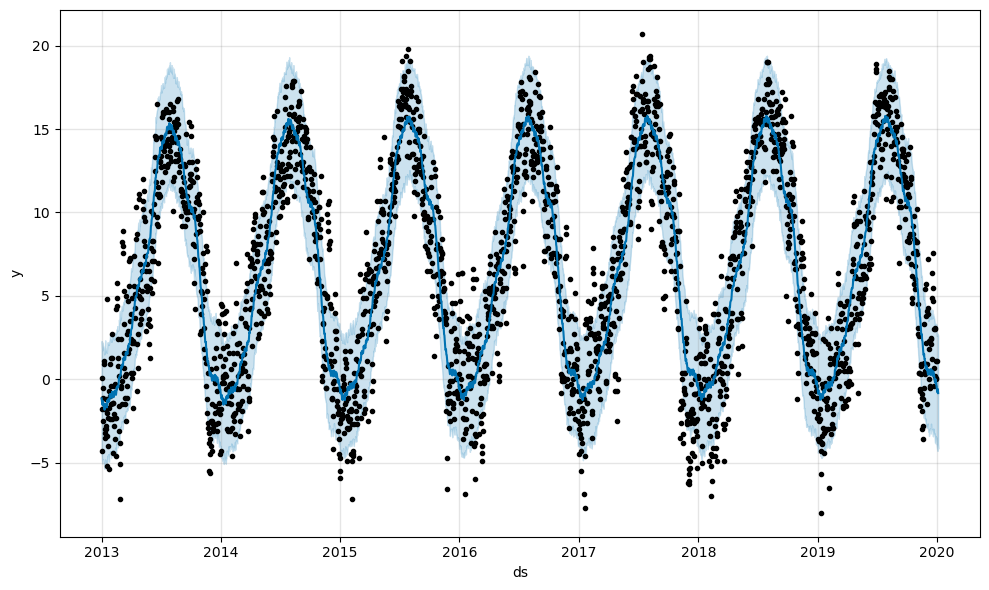

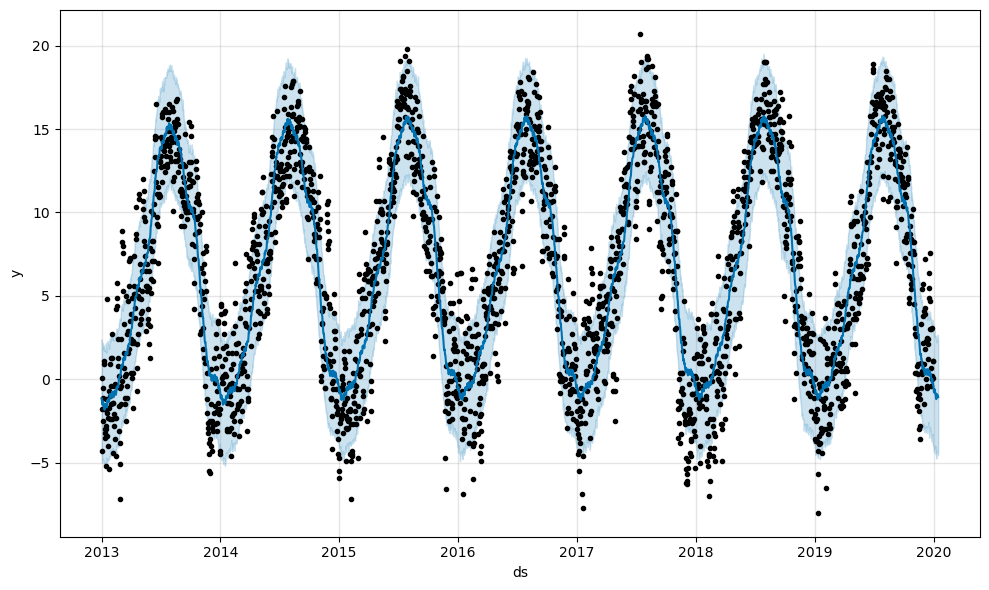

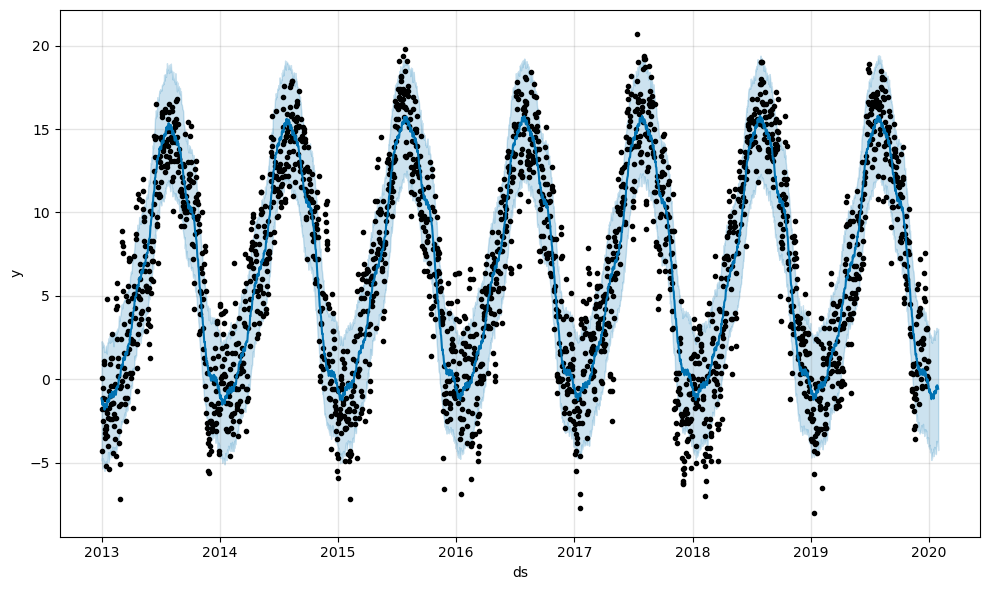

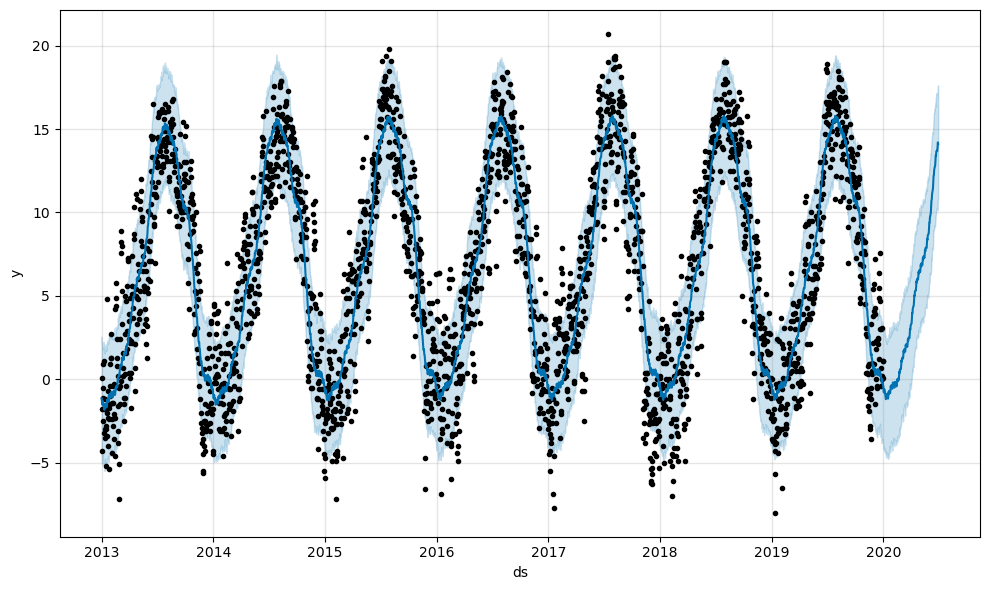

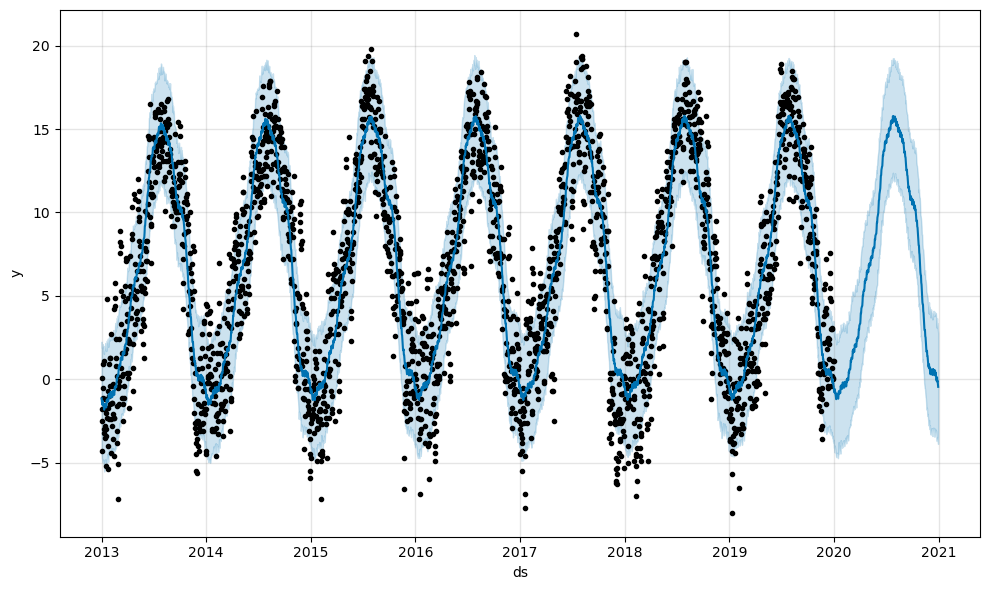

In [13]:
#Predictions and graphs

forecast32_min_5 = m32_min.predict(future32_min_5)
forecast32_min_15 = m32_min.predict(future32_min_15)
forecast32_min_30 = m32_min.predict(future32_min_30)
forecast32_min_180 = m32_min.predict(future32_min_180)
forecast32_min_365 = m32_min.predict(future32_min_365)


fig32_min_5 = m32_min.plot(forecast32_min_5)
fig32_min_15 = m32_min.plot(forecast32_min_15)
fig32_min_30 = m32_min.plot(forecast32_min_30)
fig32_min_180 = m32_min.plot(forecast32_min_180)
fig32_min_365 = m32_min.plot(forecast32_min_365)

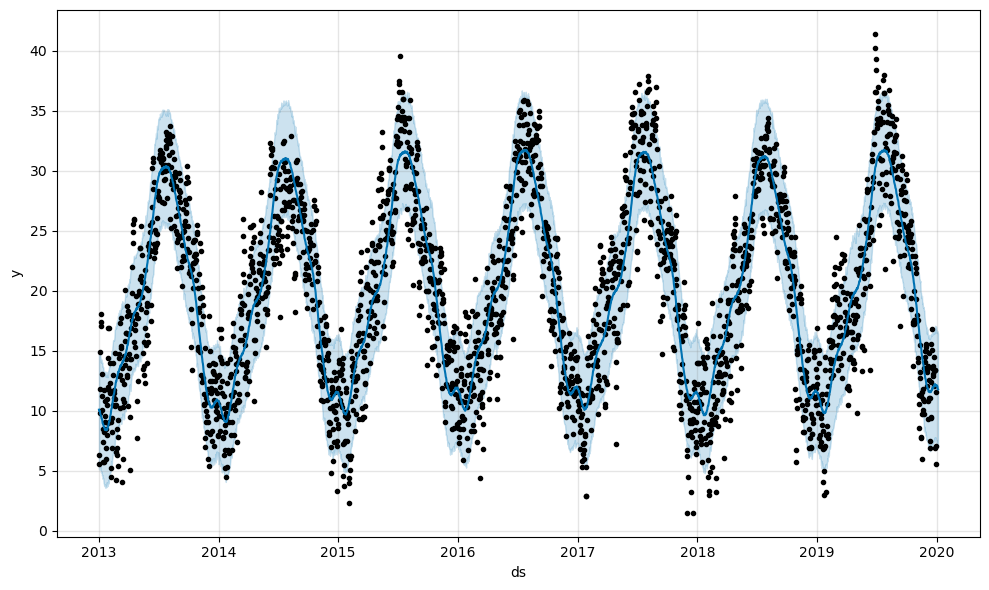

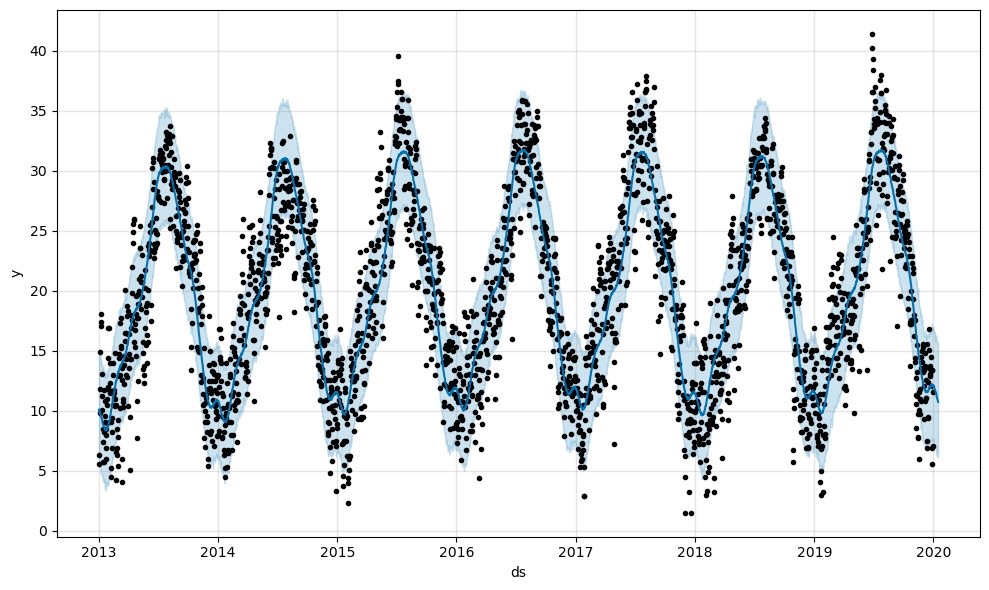

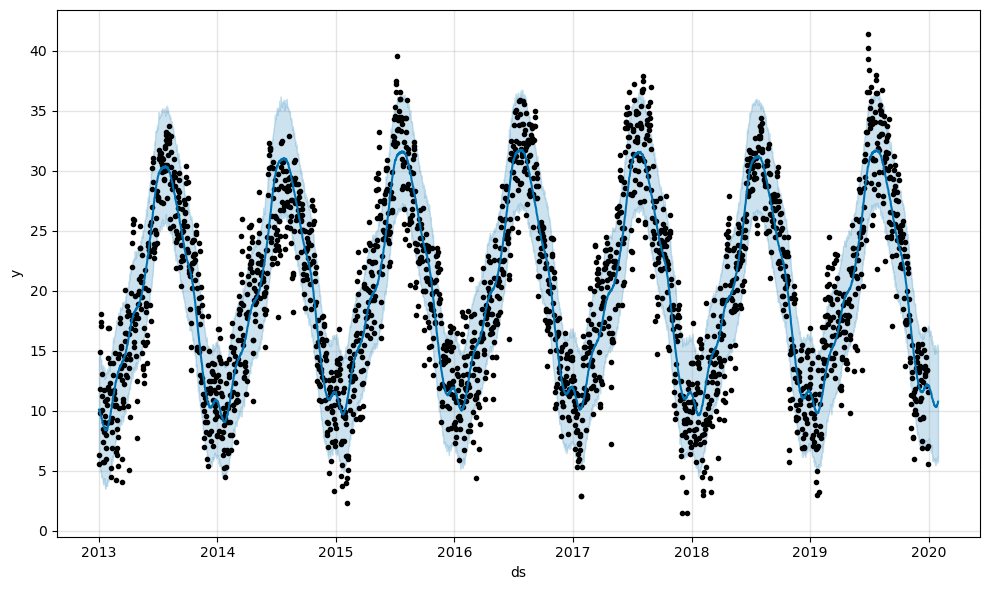

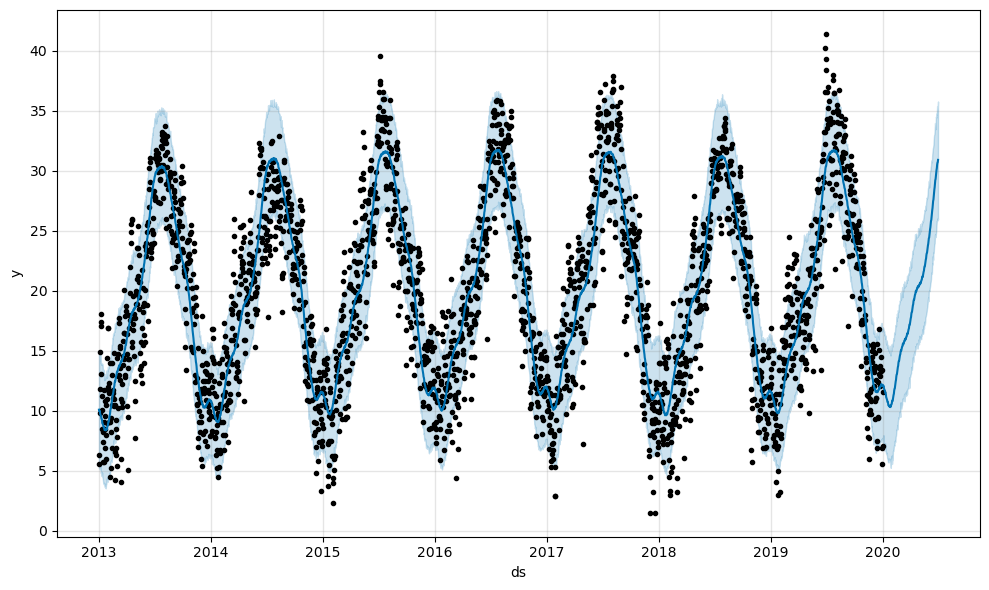

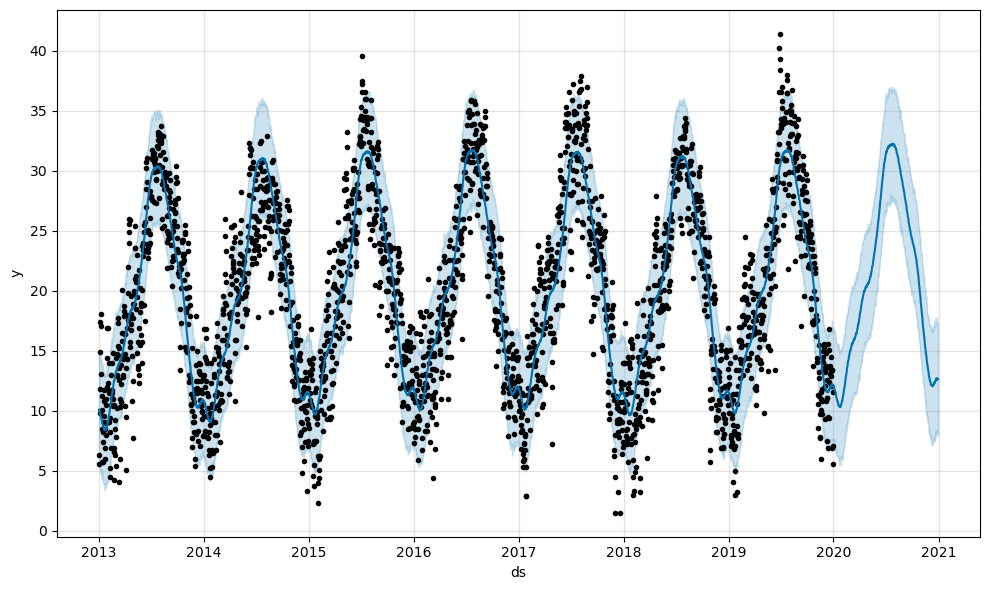

In [14]:
forecast32_max_5 = m32_max.predict(future32_max_5)
forecast32_max_15 = m32_max.predict(future32_max_15)
forecast32_max_30 = m32_max.predict(future32_max_30)
forecast32_max_180 = m32_max.predict(future32_max_180)
forecast32_max_365 = m32_max.predict(future32_max_365)


fig32_max_5 = m32_max.plot(forecast32_max_5)
fig32_max_15 = m32_max.plot(forecast32_max_15)
fig32_max_30 = m32_max.plot(forecast32_max_30)
fig32_max_180 = m32_max.plot(forecast32_max_180)
fig32_max_365 = m32_max.plot(forecast32_max_365)

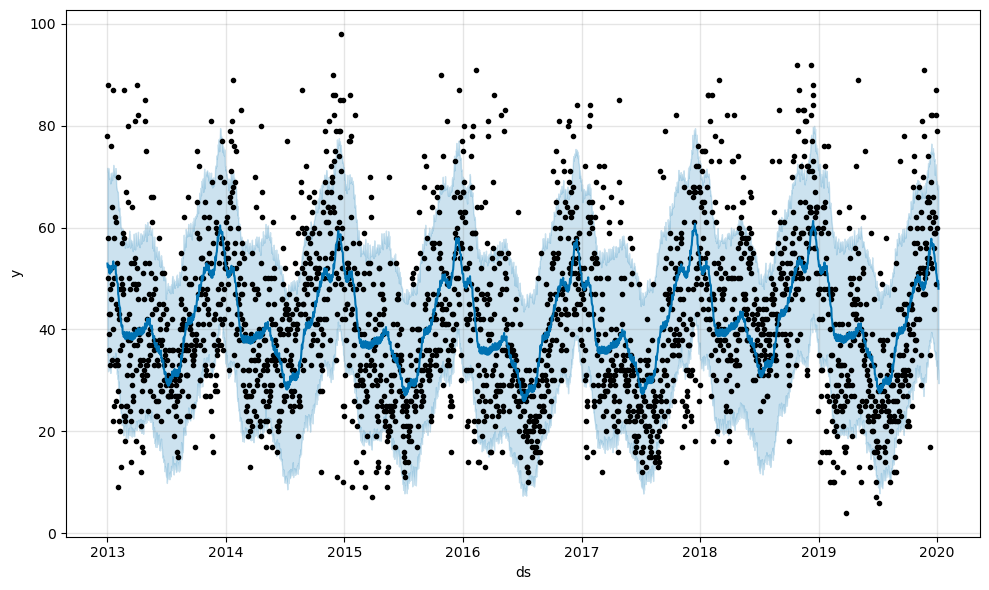

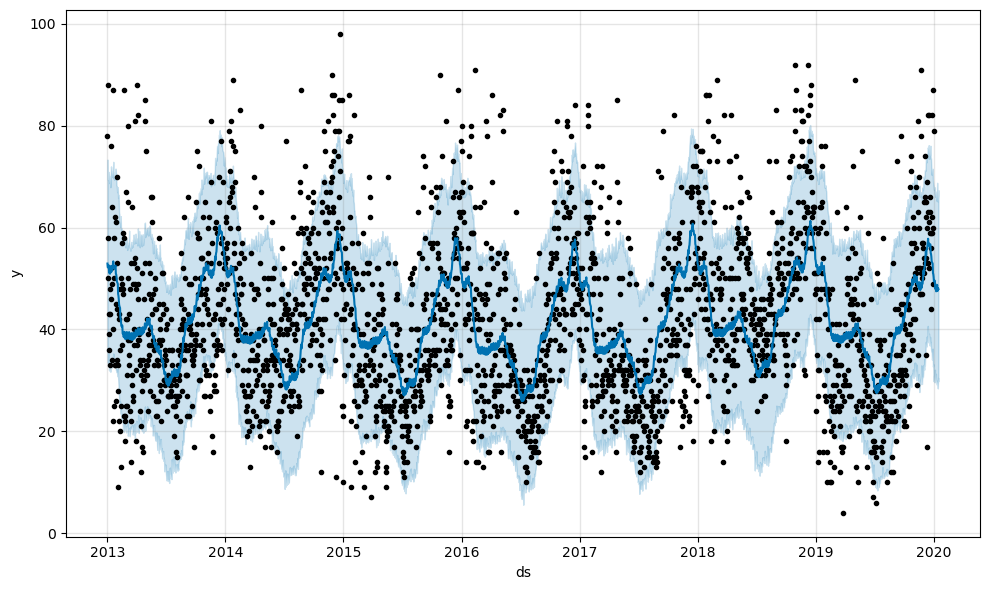

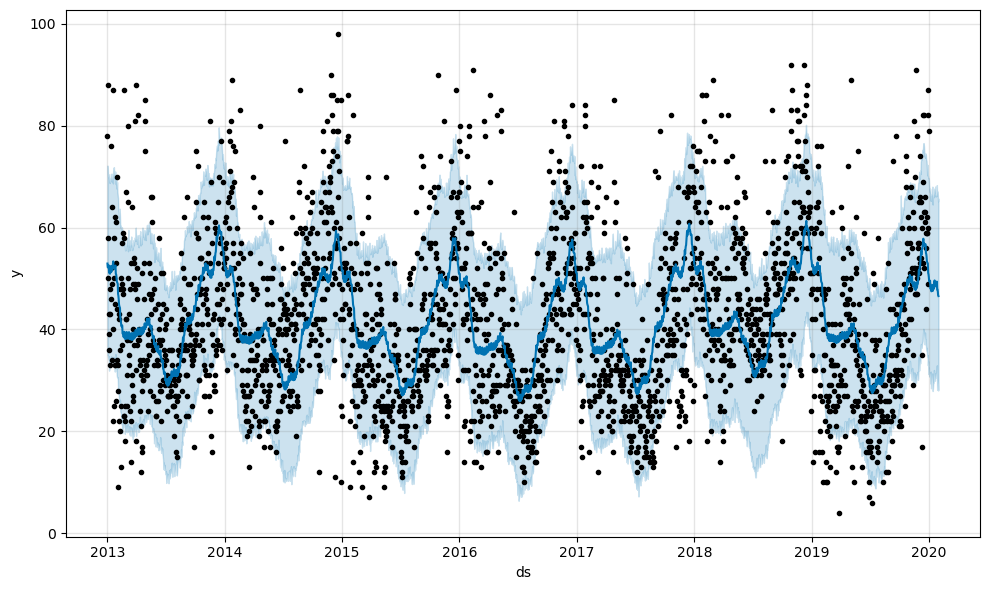

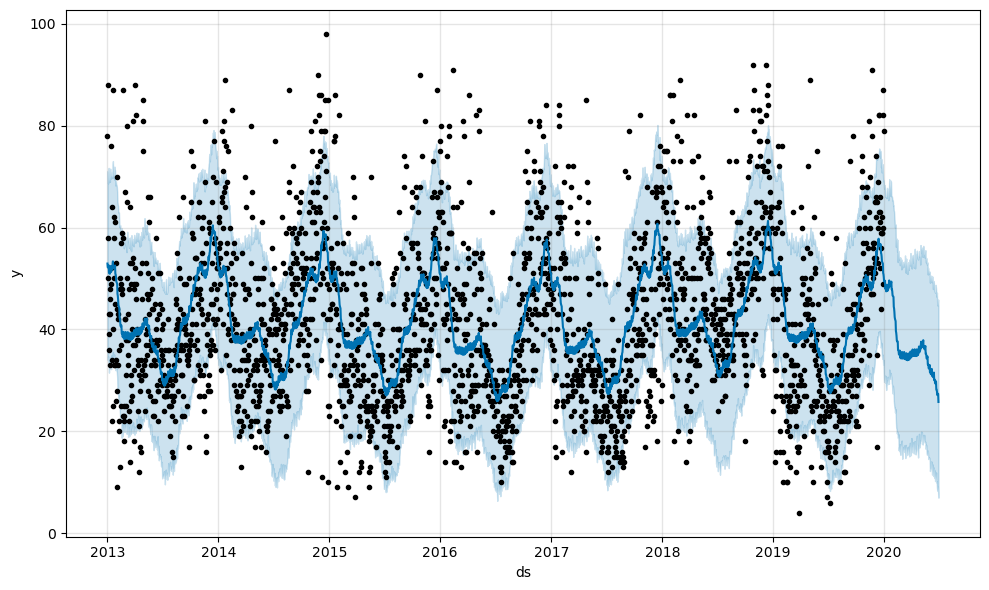

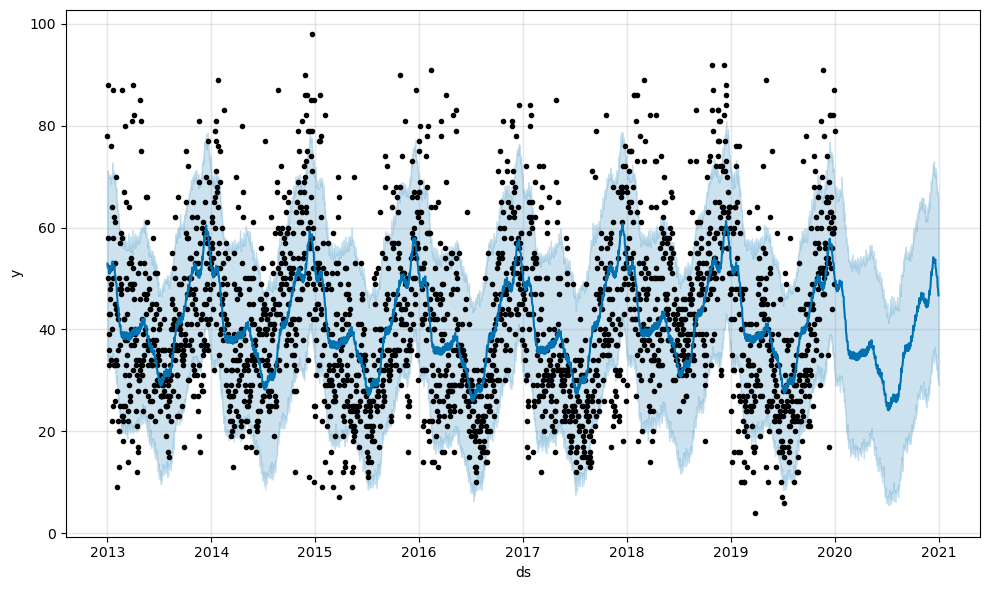

In [15]:
forecast33_min_5 = m33_min.predict(future33_min_5)
forecast33_min_15 = m33_min.predict(future33_min_15)
forecast33_min_30 = m33_min.predict(future33_min_30)
forecast33_min_180 = m33_min.predict(future33_min_180)
forecast33_min_365 = m33_min.predict(future33_min_365)


fig33_min_5 = m33_min.plot(forecast33_min_5)
fig33_min_15 = m33_min.plot(forecast33_min_15)
fig33_min_30 = m33_min.plot(forecast33_min_30)
fig33_min_180 = m33_min.plot(forecast33_min_180)
fig33_min_365 = m33_min.plot(forecast33_min_365)

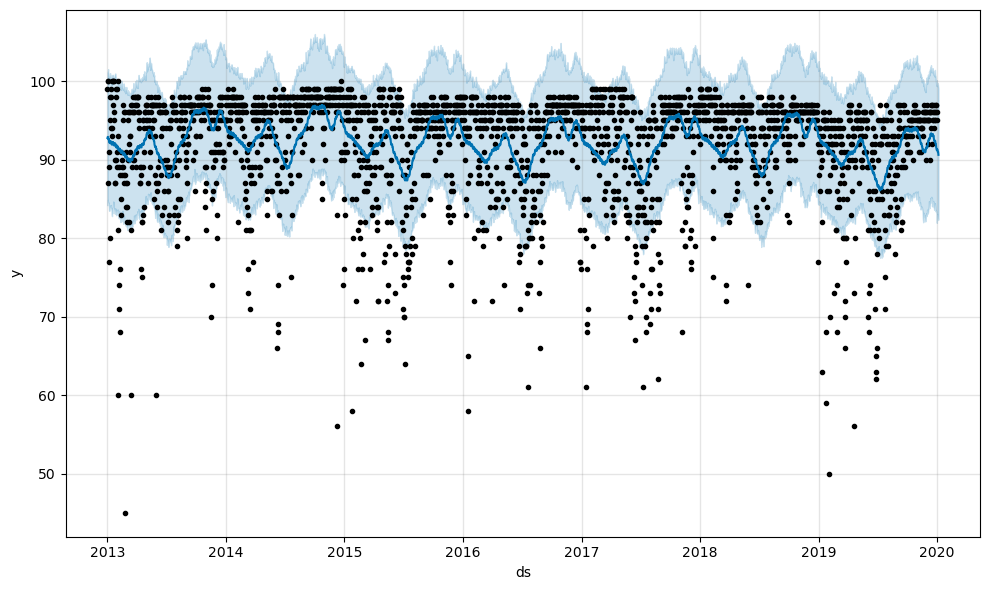

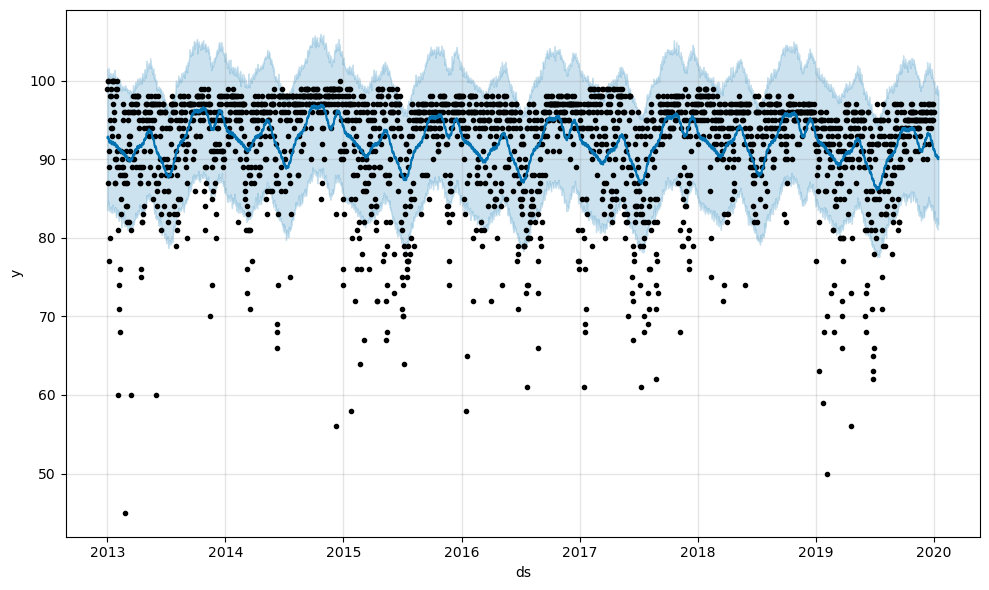

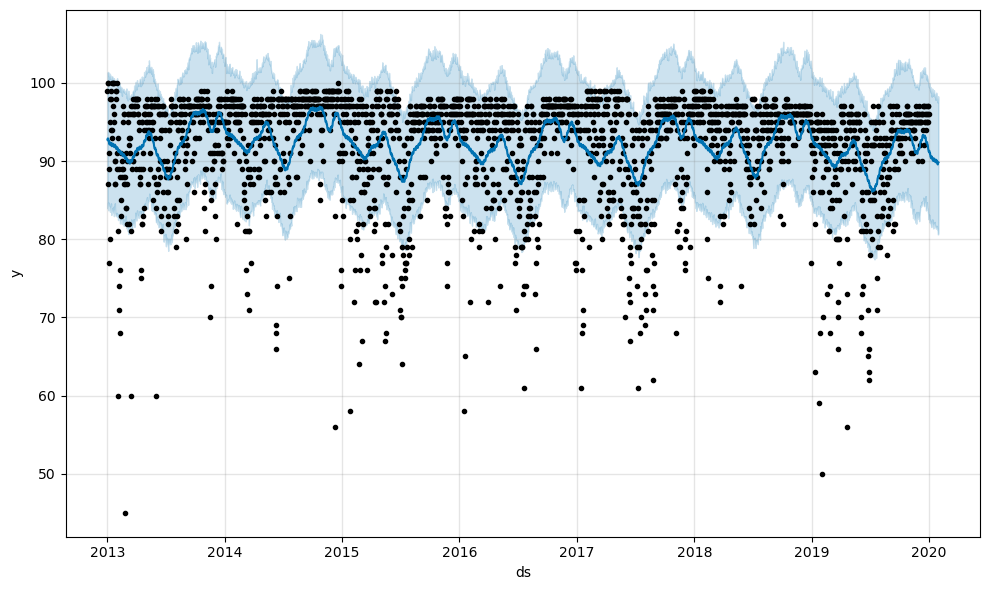

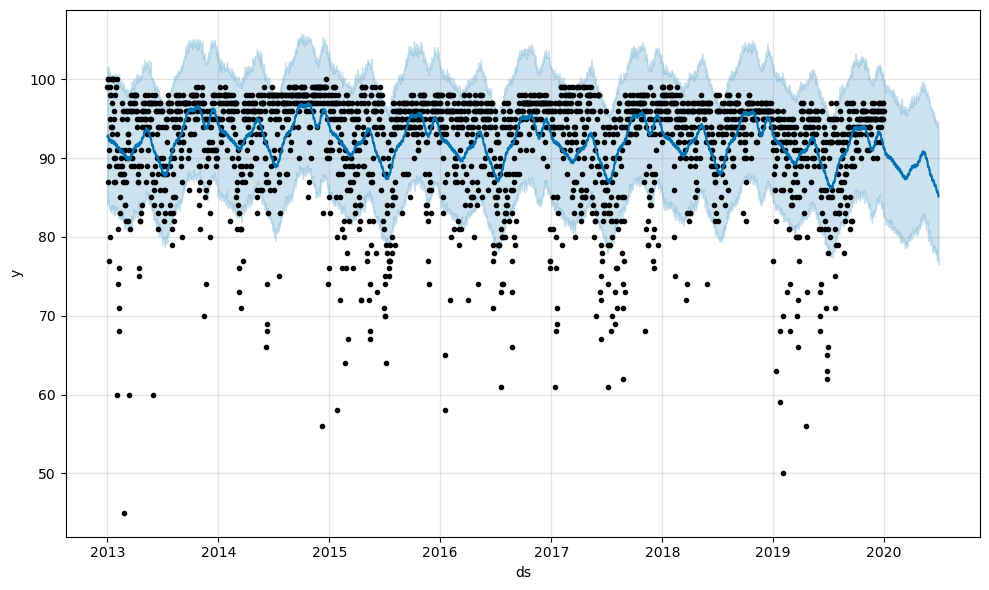

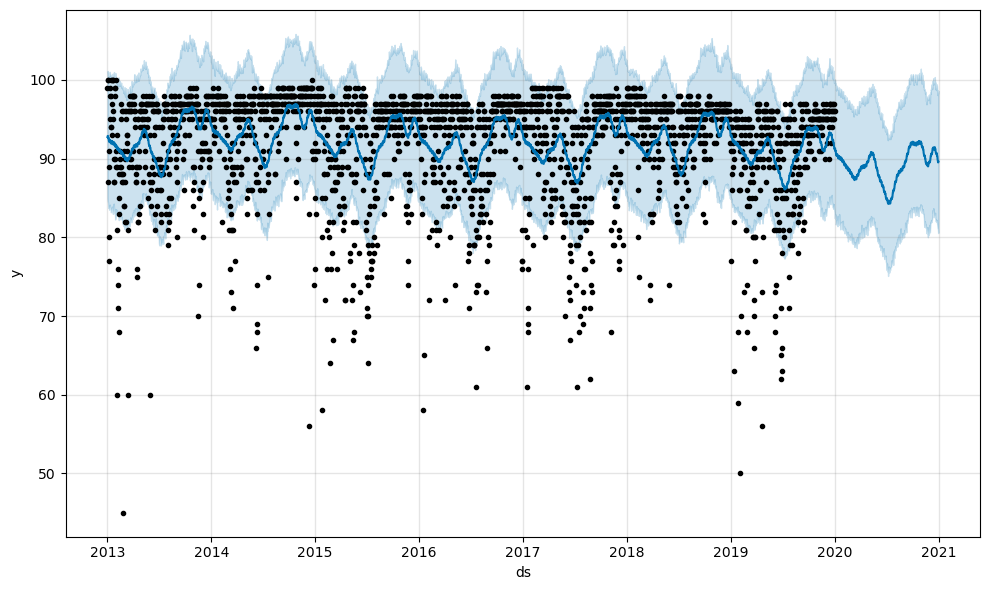

In [16]:
forecast33_max_5 = m33_max.predict(future33_max_5)
forecast33_max_15 = m33_max.predict(future33_max_15)
forecast33_max_30 = m33_max.predict(future33_max_30)
forecast33_max_180 = m33_max.predict(future33_max_180)
forecast33_max_365 = m33_max.predict(future33_max_365)


fig33_max_5 = m33_max.plot(forecast33_max_5)
fig33_max_15 = m33_max.plot(forecast33_max_15)
fig33_max_30 = m33_max.plot(forecast33_max_30)
fig33_max_180 = m33_max.plot(forecast33_max_180)
fig33_max_365 = m33_max.plot(forecast33_max_365)

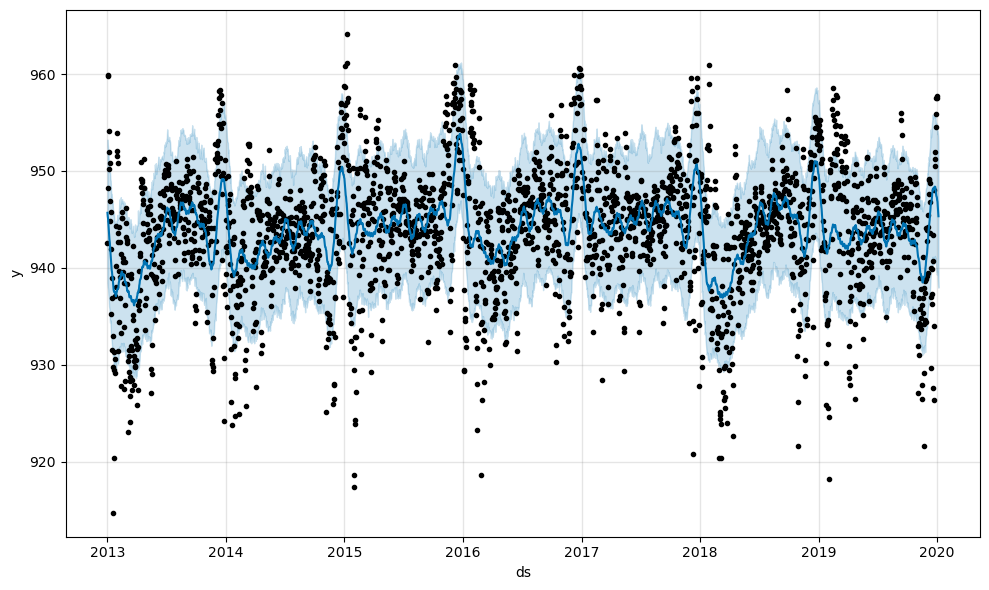

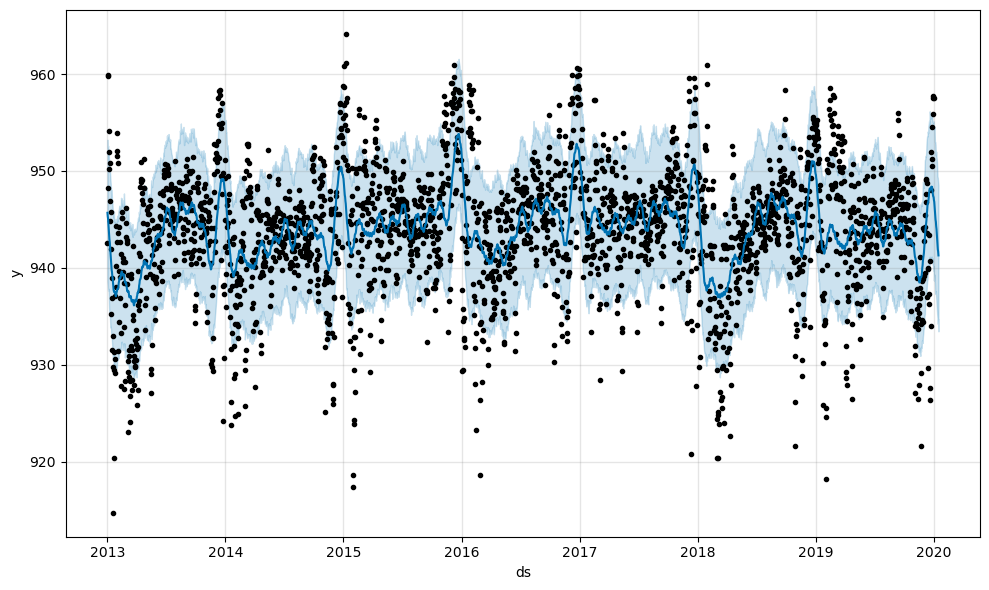

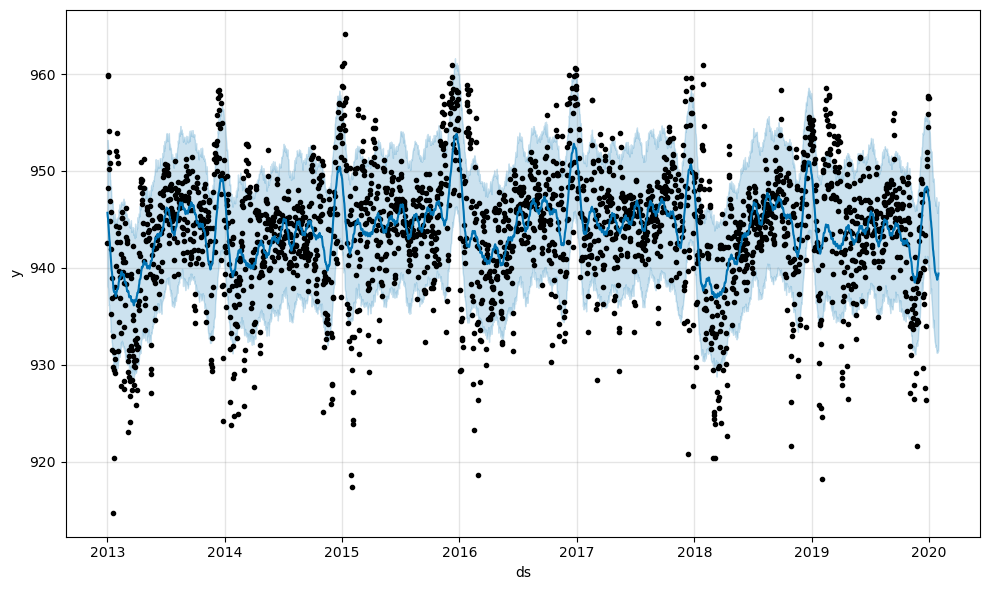

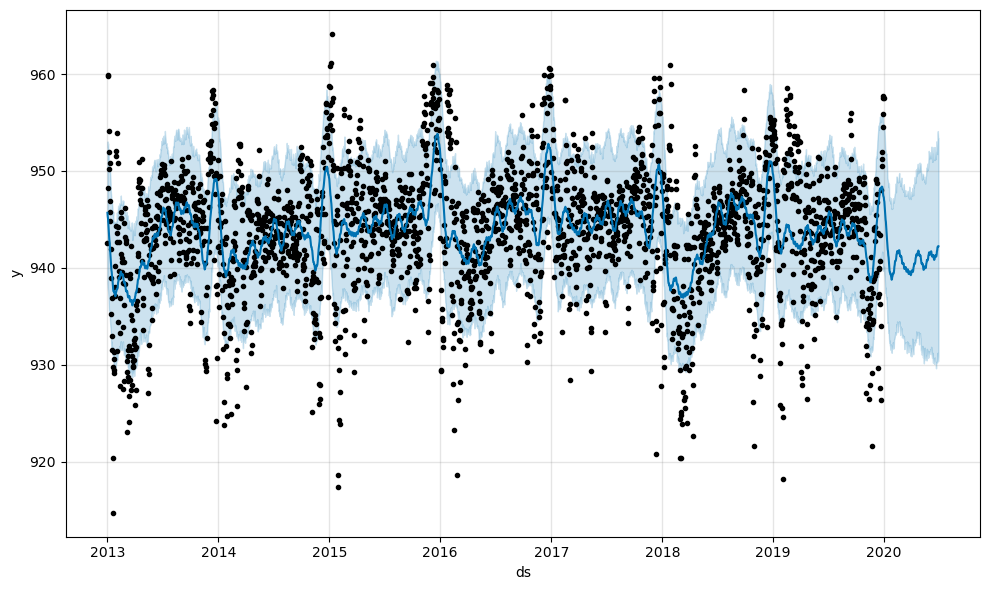

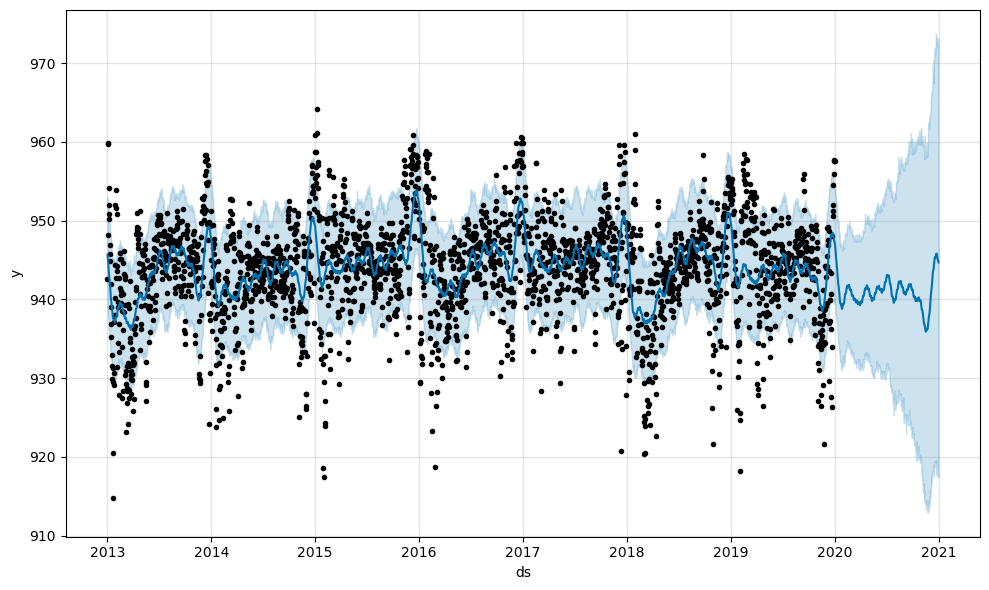

In [17]:
forecast34_mean_5 = m34_mean.predict(future34_mean_5)
forecast34_mean_15 = m34_mean.predict(future34_mean_15)
forecast34_mean_30 = m34_mean.predict(future34_mean_30)
forecast34_mean_180 = m34_mean.predict(future34_mean_180)
forecast34_mean_365 = m34_mean.predict(future34_mean_365)


fig34_mean_5 = m34_mean.plot(forecast34_mean_5)
fig34_mean_15 = m34_mean.plot(forecast34_mean_15)
fig34_mean_30 = m34_mean.plot(forecast34_mean_30)
fig34_mean_180 = m34_mean.plot(forecast34_mean_180)
fig34_mean_365 = m34_mean.plot(forecast34_mean_365)

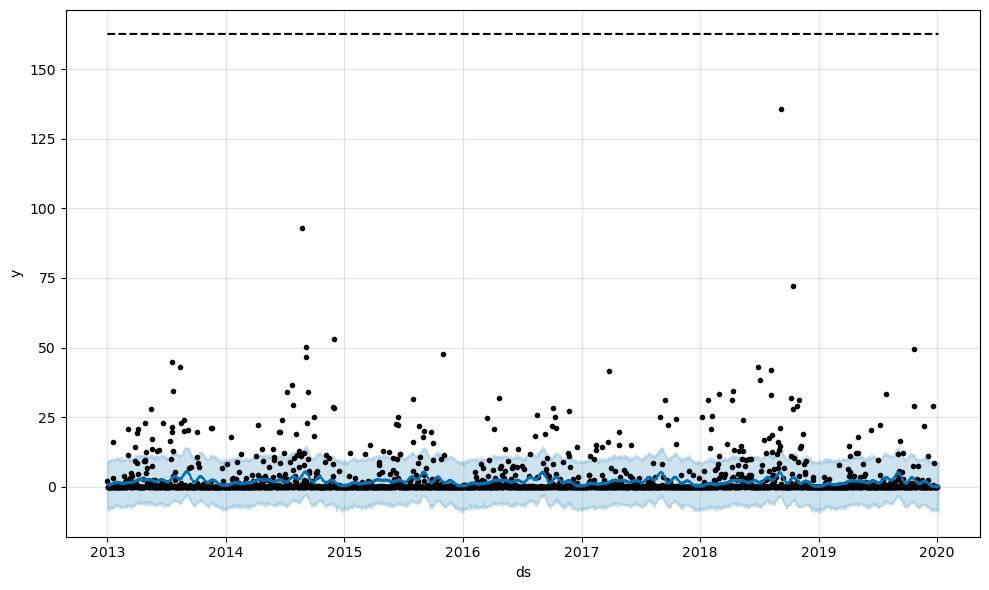

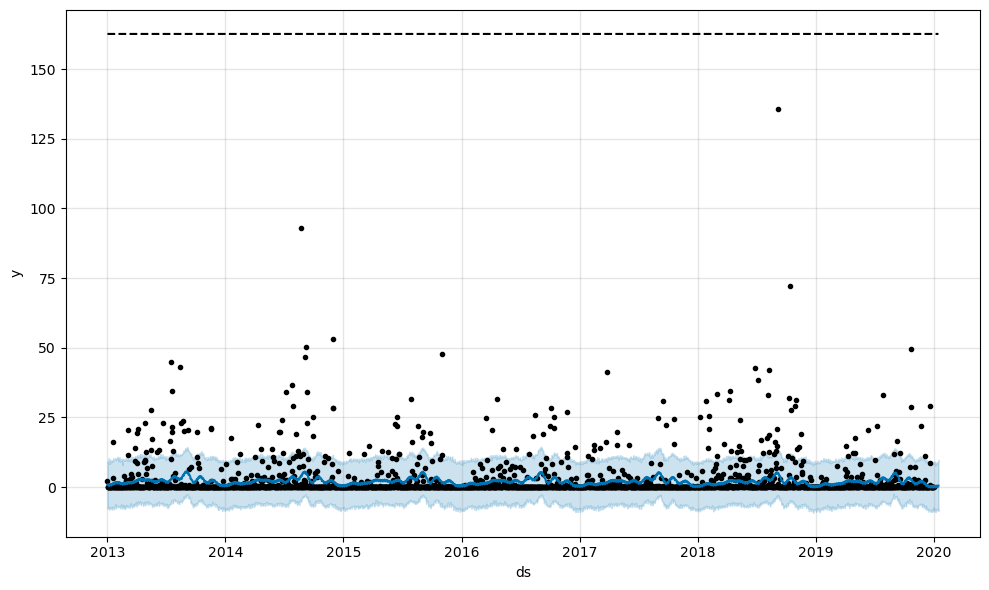

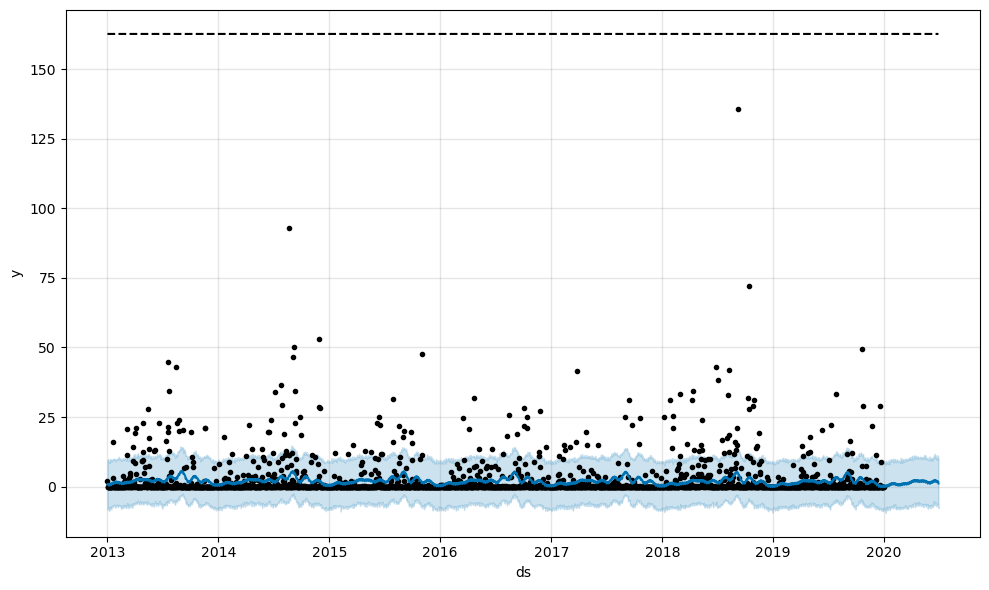

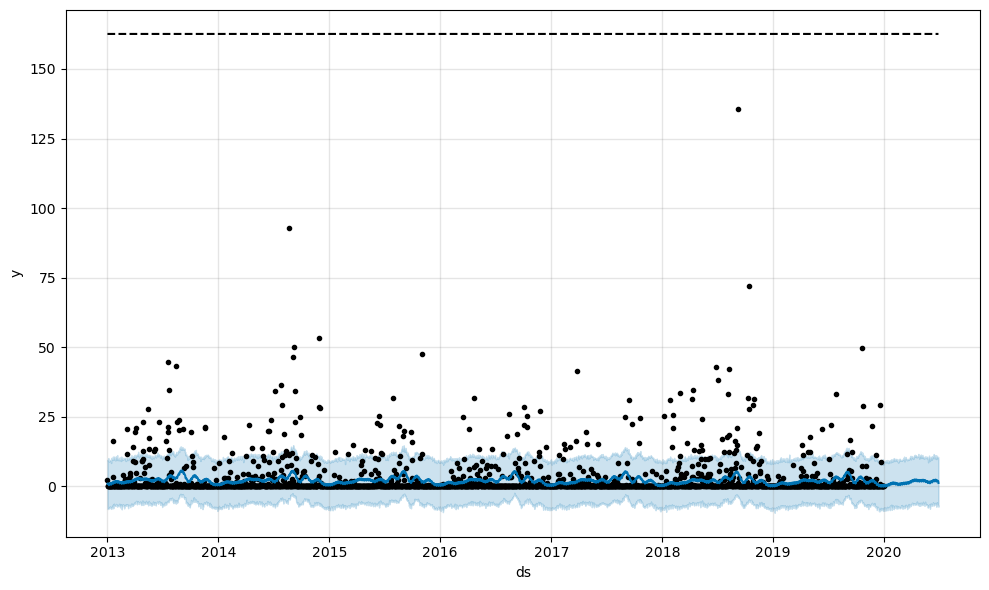

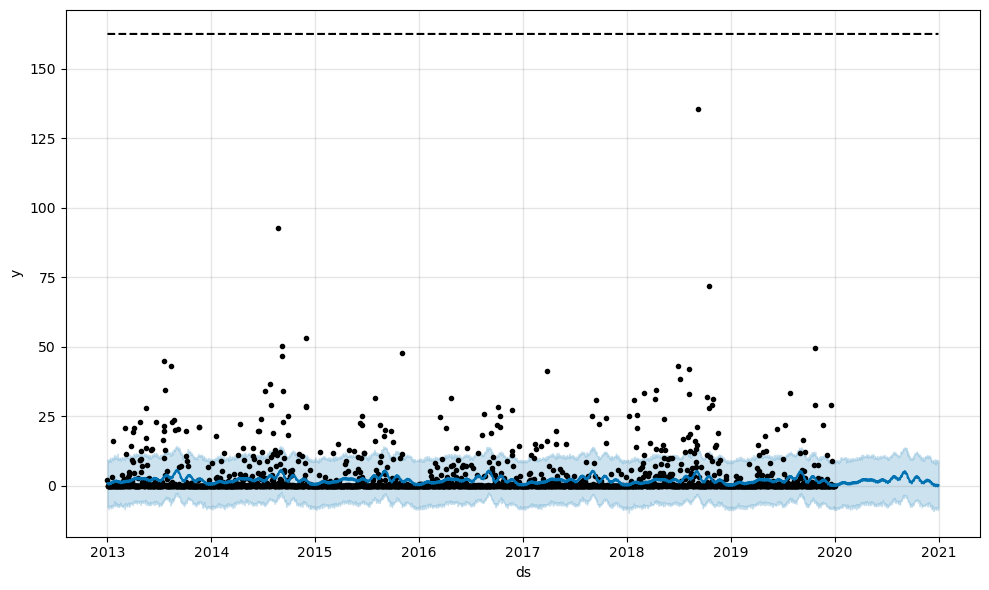

In [18]:
forecast35_sum_5 = m35_sum.predict(future35_sum_5)
forecast35_sum_15 = m35_sum.predict(future35_sum_15)
forecast35_sum_30 = m35_sum.predict(future35_sum_30)
forecast35_sum_180 = m35_sum.predict(future35_sum_180)
forecast35_sum_365 = m35_sum.predict(future35_sum_365)


fig35_sum_5 = m35_sum.plot(forecast35_sum_5)
fig35_sum_15 = m35_sum.plot(forecast35_sum_15)
fig35_sum_30 = m35_sum.plot(forecast35_sum_30)
fig35_sum_180 = m35_sum.plot(forecast35_sum_180)
fig35_sum_365 = m35_sum.plot(forecast35_sum_365)

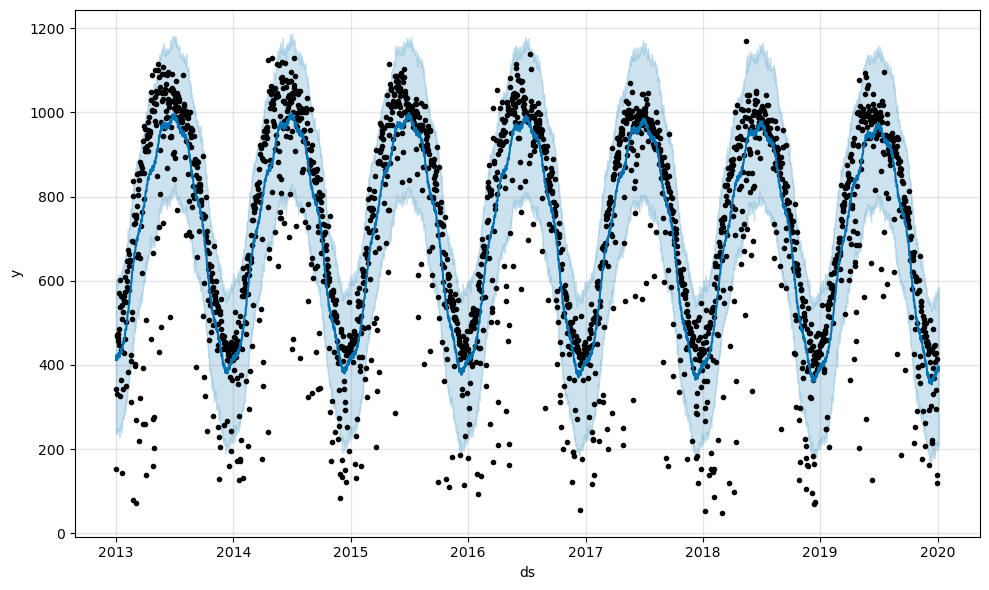

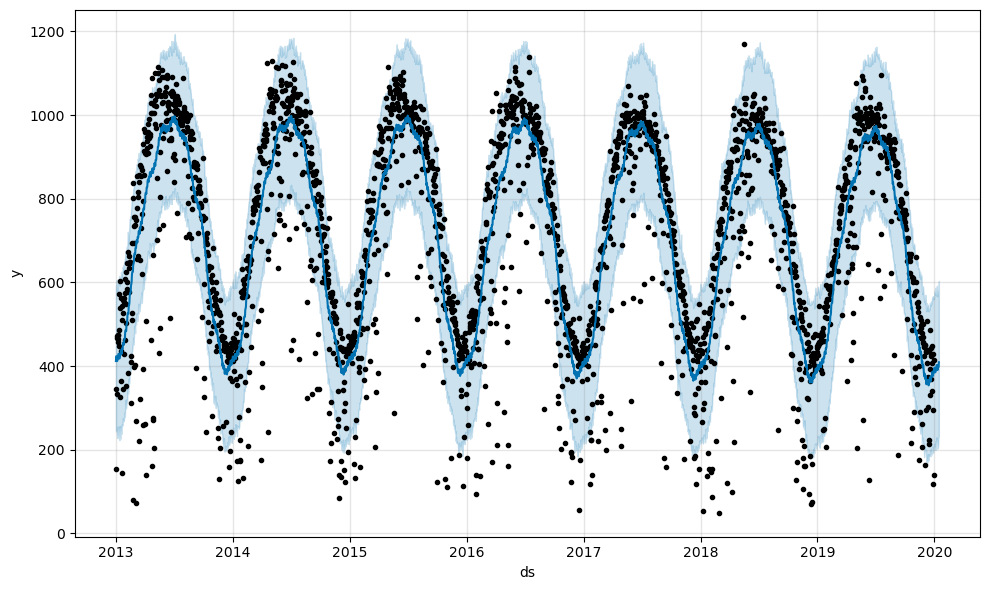

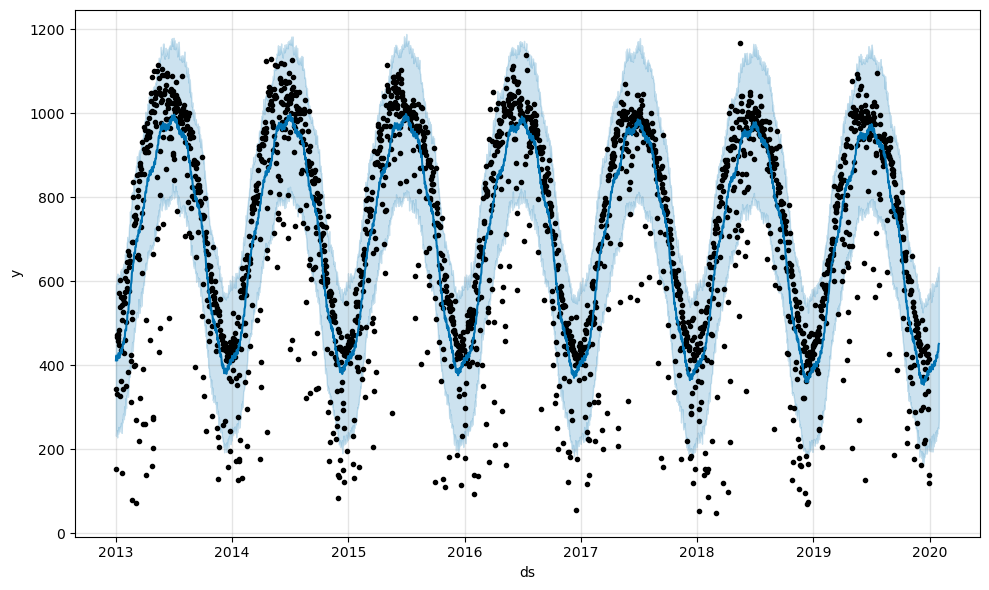

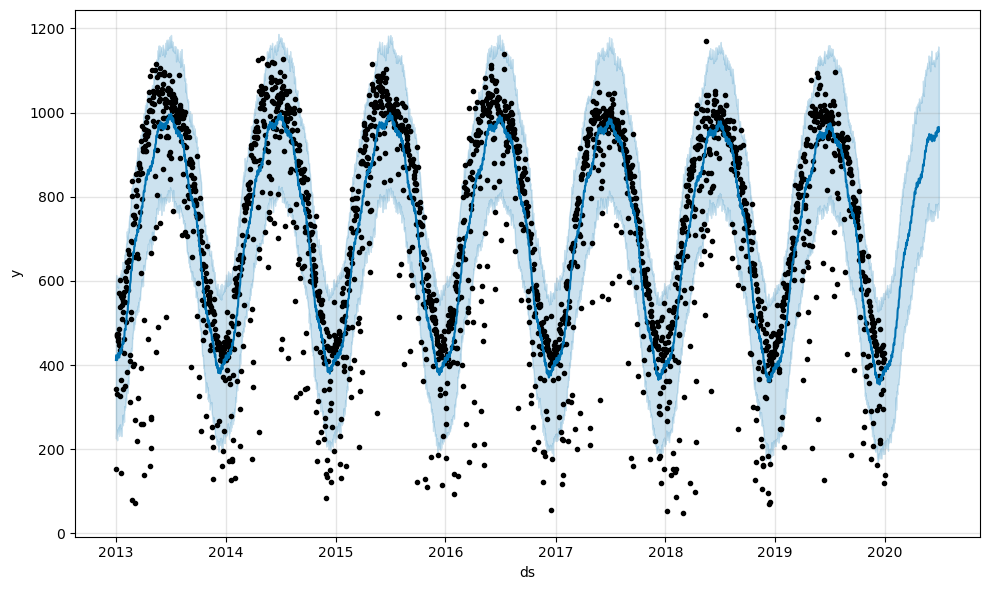

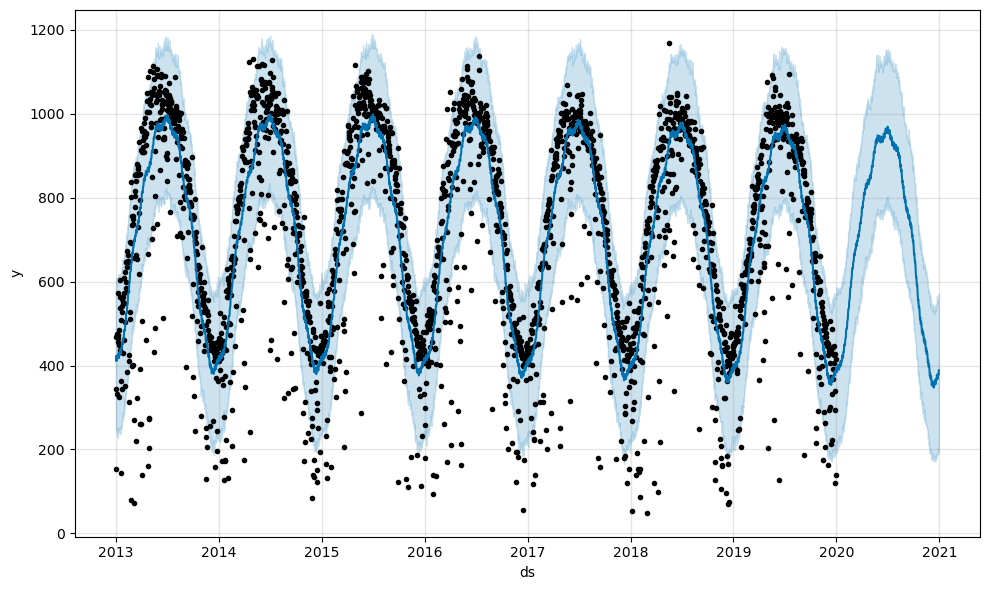

In [19]:
#Predictions and graphs

forecast36_max_5 = m36_max.predict(future36_max_5)
forecast36_max_15 = m36_max.predict(future36_max_15)
forecast36_max_30 = m36_max.predict(future36_max_30)
forecast36_max_180 = m36_max.predict(future36_max_180)
forecast36_max_365 = m36_max.predict(future36_max_365)


fig36_max_5 = m36_max.plot(forecast36_max_5)
fig36_max_15 = m36_max.plot(forecast36_max_15)
fig36_max_30 = m36_max.plot(forecast36_max_30)
fig36_max_180 = m36_max.plot(forecast36_max_180)
fig36_max_365 = m36_max.plot(forecast36_max_365)

In [20]:
#yhat_list[-5:]

#From the data it is choosen the frame that is going to be used for the training


filtro_predict = (df_completo['sin_fecha'] >= '2020-01-01') & (df_completo['sin_fecha'] <= '2020-12-31')
resultados_predict = df_completo[filtro_predict]

# Mostrar los resultados filtrados
resultados_predict

data         dataExtrem  valor estat baseHoraria codi  \
3926648  2020-09-20T00:00Z  2020-09-20T00:00Z  942.9     V          SH   CC   
3926649  2020-09-20T00:30Z  2020-09-20T00:30Z  942.6     V          SH   CC   
3926650  2020-09-20T01:00Z  2020-09-20T01:23Z  942.8     V          SH   CC   
3926651  2020-09-20T01:30Z  2020-09-20T01:40Z  942.9     V          SH   CC   
3926652  2020-09-20T02:00Z  2020-09-20T02:01Z  942.7     V          SH   CC   
...                    ...                ...    ...   ...         ...  ...   
4294457  2020-05-09T21:30Z  2020-05-09T21:30Z    0.0     V          SH   CC   
4294458  2020-05-09T22:00Z  2020-05-09T22:00Z    0.0     V          SH   CC   
4294459  2020-05-09T22:30Z  2020-05-09T22:30Z    0.0     V          SH   CC   
4294460  2020-05-09T23:00Z  2020-05-09T23:00Z    0.0     V          SH   CC   
4294461  2020-05-09T23:30Z  2020-05-09T23:30Z    0.0     V          SH   CC   

        variables.codi   sin_fecha  
3926648              1  2020-09-20  
3926649              1  2020-09-20  
3926650              1  2020-09-20  
3926651              1  2020-09-20  
3926652              1  2020-09-20  
...                ...         ...  
4294457             72  2020-05-09  
4294458             72  2020-05-09  
4294459             72  2020-05-09  
4294460             72  2020-05-09  
4294461             72  2020-05-09  

[367814 rows x 8 columns]

In [21]:
#Separation in different objets the different values that are going to be predicted

df_codi32_p = resultados_predict.loc[resultados_predict['variables.codi']==32].reset_index(drop=True)
df_codi32_p=pd.DataFrame(pd.concat([df_codi32_p.sin_fecha, df_codi32_p.valor], axis = 1))
prophet_names = ['ds', 'y']
df_codi32_p.columns = prophet_names
df_codi32_p

df_codi33_p = resultados_predict.loc[resultados_predict['variables.codi']==33].reset_index(drop=True)
df_codi33_p=pd.DataFrame(pd.concat([df_codi33_p.sin_fecha, df_codi33_p.valor], axis = 1))
prophet_names = ['ds', 'y']
df_codi33_p.columns = prophet_names
df_codi33_p

df_codi34_p = resultados_predict.loc[resultados_predict['variables.codi']==34].reset_index(drop=True)
df_codi34_p=pd.DataFrame(pd.concat([df_codi34_p.sin_fecha, df_codi34_p.valor], axis = 1))
prophet_names = ['ds', 'y']
df_codi34_p.columns = prophet_names
df_codi34_p

df_codi35_p = resultados_predict.loc[resultados_predict['variables.codi']==35].reset_index(drop=True)
df_codi35_p=pd.DataFrame(pd.concat([df_codi35_p.sin_fecha, df_codi35_p.valor], axis = 1))
prophet_names = ['ds', 'y']
df_codi35_p.columns = prophet_names
df_codi35_p

df_codi36_p = resultados_predict.loc[resultados_predict['variables.codi']==36].reset_index(drop=True)
df_codi36_p=pd.DataFrame(pd.concat([df_codi36_p.sin_fecha, df_codi36_p.valor], axis = 1))
prophet_names = ['ds', 'y']
df_codi36_p.columns = prophet_names
df_codi36_p



#Codi 32 is Tepredict

ds    y
0      2020-09-20  0.0
1      2020-09-20  0.0
2      2020-09-20  0.0
3      2020-09-20  0.0
4      2020-09-20  0.0
...           ...  ...
17515  2020-05-09  0.0
17516  2020-05-09  0.0
17517  2020-05-09  0.0
17518  2020-05-09  0.0
17519  2020-05-09  0.0

[17520 rows x 2 columns]

In [22]:
unique_days_predict = df_codi32_p.ds.unique()


In [23]:
# Here we get the min, max, mean and sum for the different sets of data for each codi
unique_days_predict = df_codi32_p.ds.unique()
codi32_min_array, codi32_max_array = min_max_codi(df_codi32_p, unique_days_predict)
codi33_min_array, codi33_max_array = min_max_codi(df_codi33_p, unique_days_predict)
codi34_mean_array = mean_codi(df_codi34_p, unique_days_predict)
codi35_sum_array = sum_codi(df_codi35_p, unique_days_predict)
codi36_min_array, codi36_max_array = min_max_codi(df_codi36_p, unique_days_predict)

100%|██████████| 365/365 [00:00<00:00, 1505.76it/s]


In [24]:
# Here we take the data for each codi and put it in a dataframe with columns
# ds and y, so that it is ready for Prophet

# Codi 32 - min y max
df_codi32_max_predict = pd.DataFrame(np.vstack((unique_days_predict, codi32_max_array)).T)
df_codi32_max_predict.columns = ['ds', 'y']
df_codi32_max_predict = df_codi32_max_predict.sort_values('ds').reset_index(drop = True)

df_codi32_min_predict = pd.DataFrame(np.vstack((unique_days_predict, codi32_min_array)).T)
df_codi32_min_predict.columns = ['ds', 'y']
df_codi32_min_predict = df_codi32_min_predict.sort_values('ds').reset_index(drop = True)

# Codi 33 - min y max
df_codi33_max_predict = pd.DataFrame(np.vstack((unique_days_predict, codi33_max_array)).T)
df_codi33_max_predict.columns = ['ds', 'y']
df_codi33_max_predict = df_codi33_max_predict.sort_values('ds').reset_index(drop = True)

df_codi33_min_predict = pd.DataFrame(np.vstack((unique_days_predict, codi33_min_array)).T)
df_codi33_min_predict.columns = ['ds', 'y']
df_codi33_min_predict = df_codi33_min_predict.sort_values('ds').reset_index(drop = True)

# Codi 34 - mean
df_codi34_mean_predict = pd.DataFrame(np.vstack((unique_days_predict, codi34_mean_array)).T)
df_codi34_mean_predict.columns = ['ds', 'y']
df_codi34_mean_predict = df_codi34_mean_predict.sort_values('ds').reset_index(drop = True)

# Codi 35 - sum
df_codi35_sum_predict = pd.DataFrame(np.vstack((unique_days_predict, codi35_sum_array)).T)
df_codi35_sum_predict.columns = ['ds', 'y']
df_codi35_sum_predict = df_codi35_sum_predict.sort_values('ds').reset_index(drop = True)

# Codi 36 - min y max
df_codi36_max_predict = pd.DataFrame(np.vstack((unique_days_predict, codi36_max_array)).T)
df_codi36_max_predict.columns = ['ds', 'y']
df_codi36_max_predict = df_codi36_max_predict.sort_values('ds').reset_index(drop = True)

df_codi36_min_predict = pd.DataFrame(np.vstack((unique_days_predict, codi36_min_array)).T)
df_codi36_min_predict.columns = ['ds', 'y']
df_codi36_min_predict = df_codi36_min_predict.sort_values('ds').reset_index(drop = True)

df_codi36.columns = prophet_names


In [25]:
forecasts = [forecast32_max_365, 
            forecast32_min_365, 
            forecast33_max_365, 
            forecast33_min_365, 
            forecast34_mean_365, 
            forecast35_sum_365, 
            forecast36_max_365]

df_codis = [df_codi32_max, 
            df_codi32_min, 
            df_codi33_max, 
            df_codi33_min, 
            df_codi34_mean, 
            df_codi35_sum, 
            df_codi36_max]

true_data = [df_codi32_max_predict, 
            df_codi32_min_predict, 
            df_codi33_max_predict, 
            df_codi33_min_predict, 
            df_codi34_mean_predict, 
            df_codi35_sum_predict, 
            df_codi36_max_predict]

codi_names = ['df_codi32_max', 
            'df_codi32_min', 
            'df_codi33_max', 
            'df_codi33_min', 
            'df_codi34_mean', 
            'df_codi35_sum', 
            'df_codi36_max']

titles = ['Max. Temperatura Forecasting', 
         'Min. Temperatura Forecasting', 
         'Max. Humedad Forecasting', 
         'Min. Humedad Forecasting', 
         'Presion Atmosferica Forecasting', 
         'Precipitacion Forecasting', 
         'UV Forecasting']

ylabs = ['Max. Temperatura', 
         'Min. Temperatura', 
         'Max. Humedad', 
         'Min. Humedad', 
         'Presion Atmosferica', 
         'Precipitacion', 
         'UV']

array(['2013-07-18', '2013-08-13', '2014-08-22', '2014-09-05',
       '2014-09-06', '2014-11-29', '2015-11-02', '2017-03-25',
       '2018-06-28', '2018-08-08', '2018-09-06', '2018-10-14',
       '2019-10-22'], dtype=object)

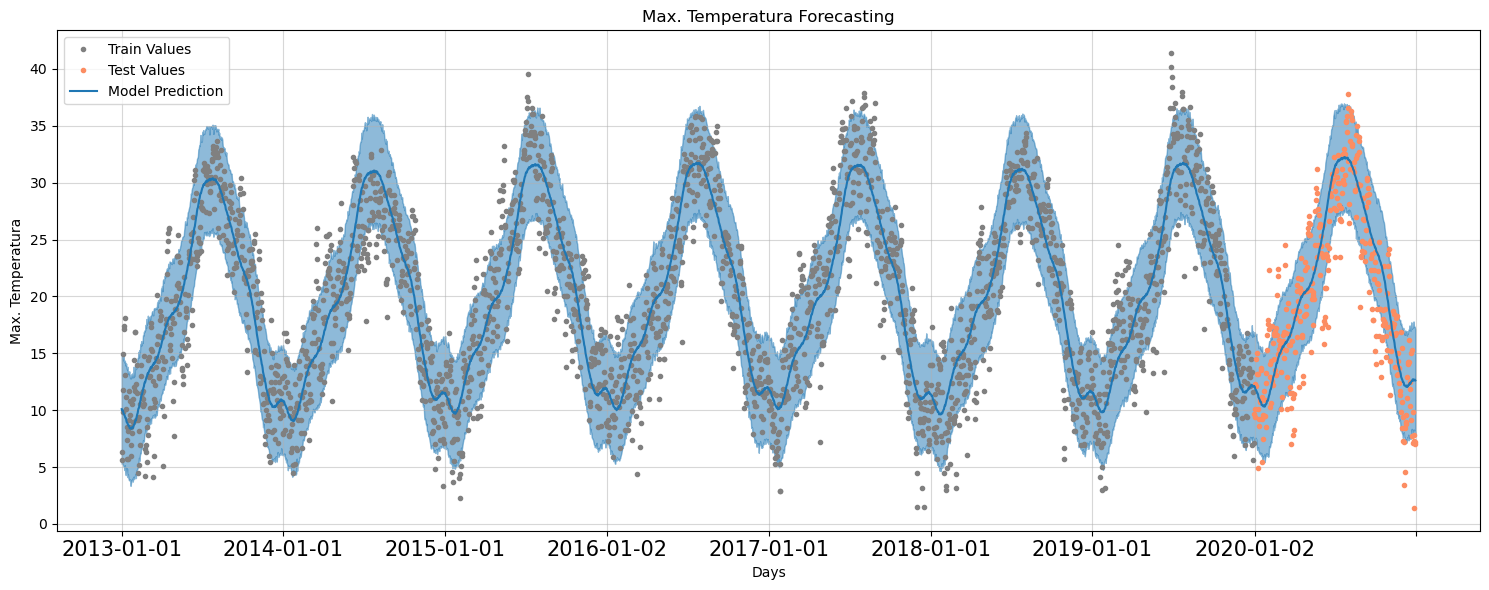

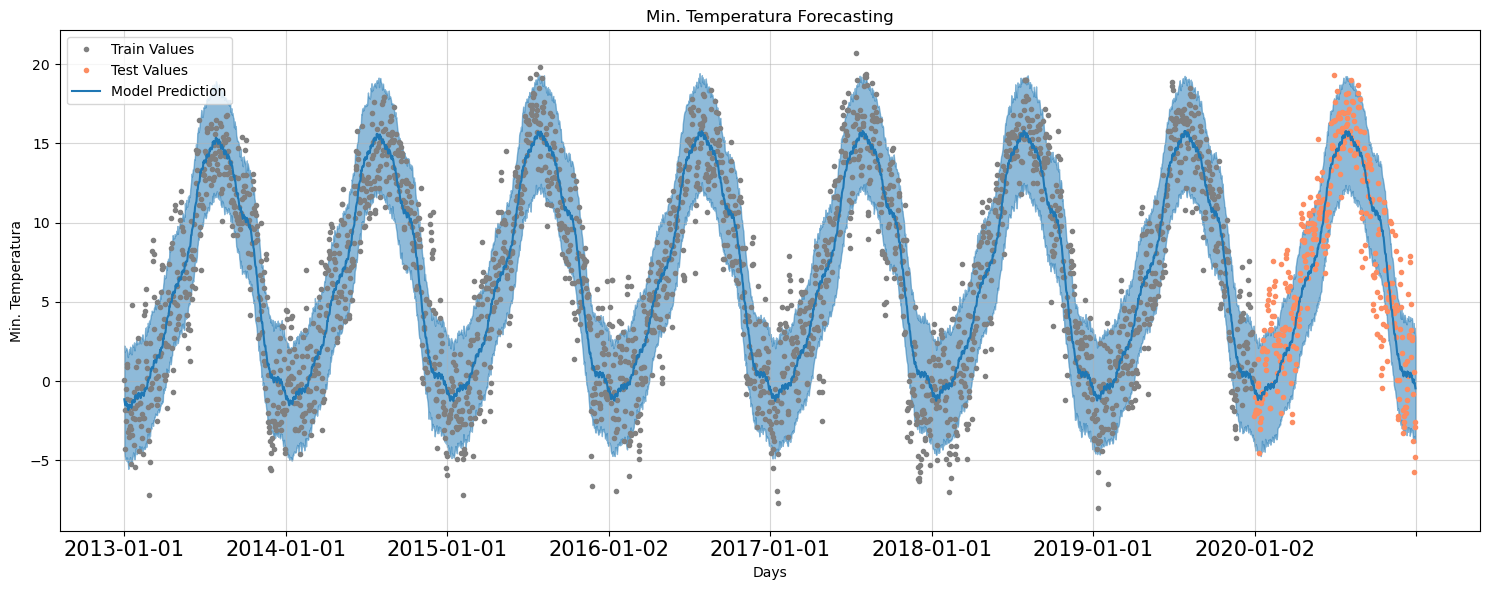

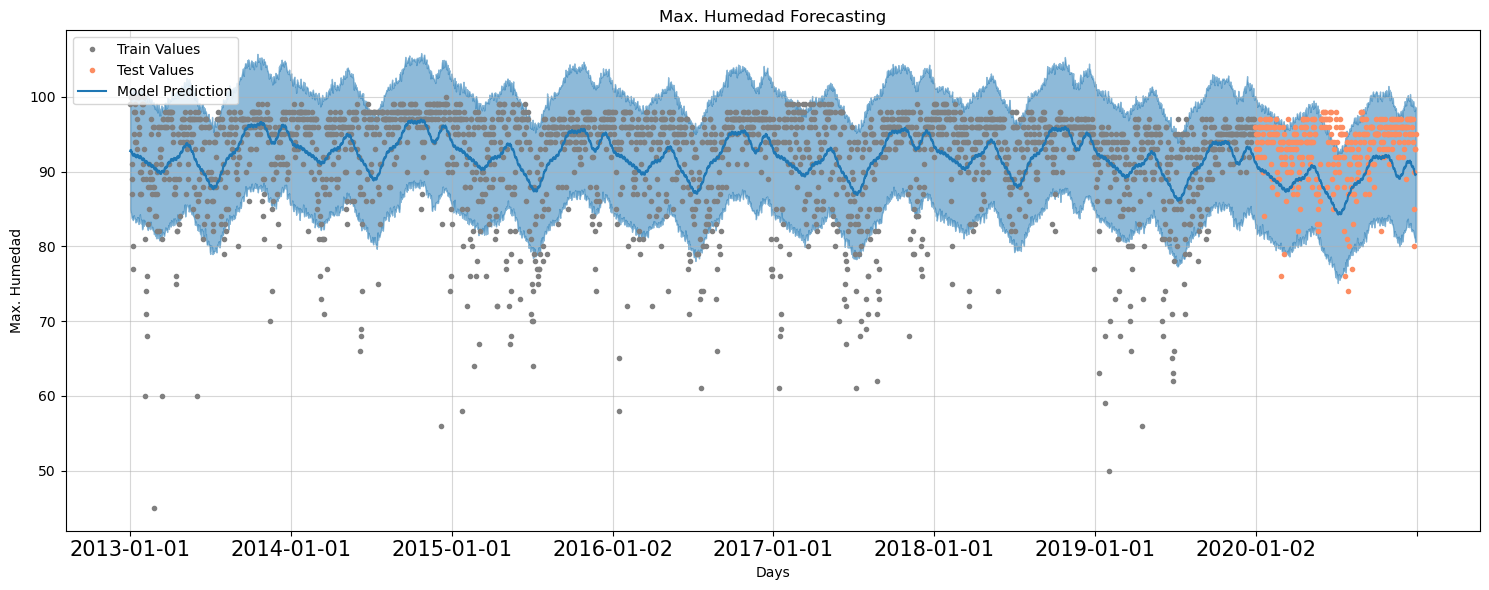

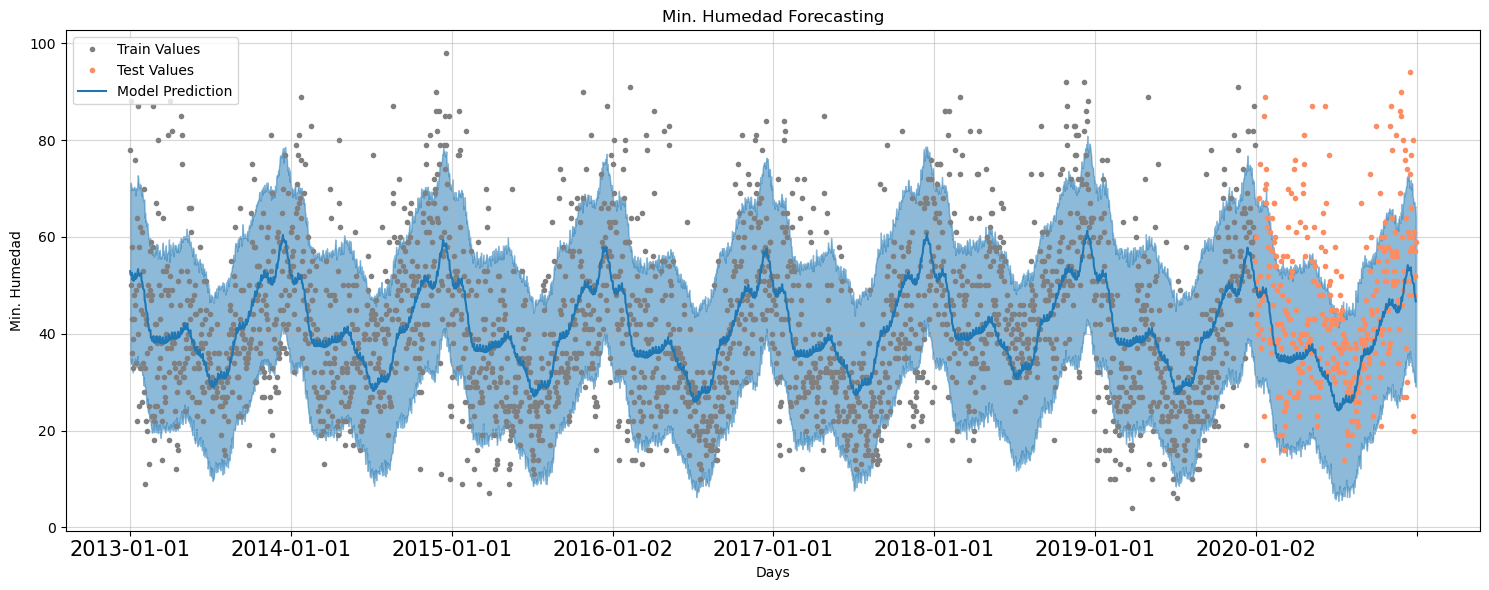

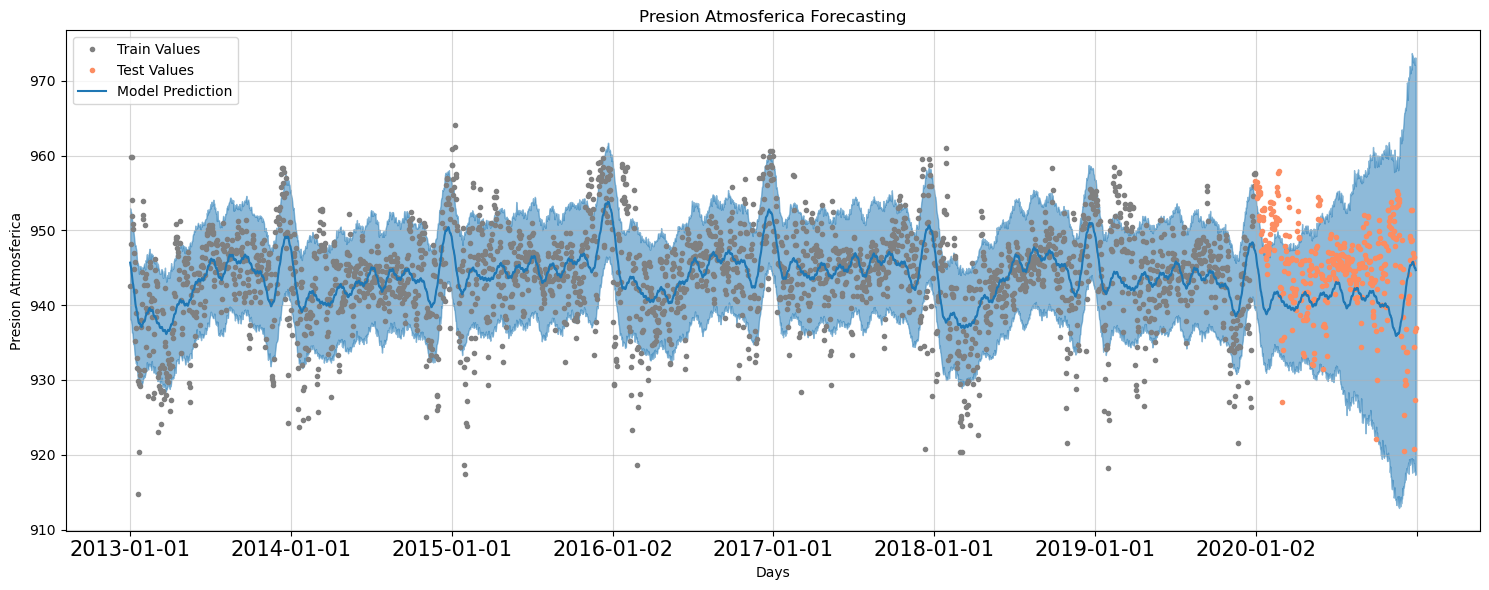

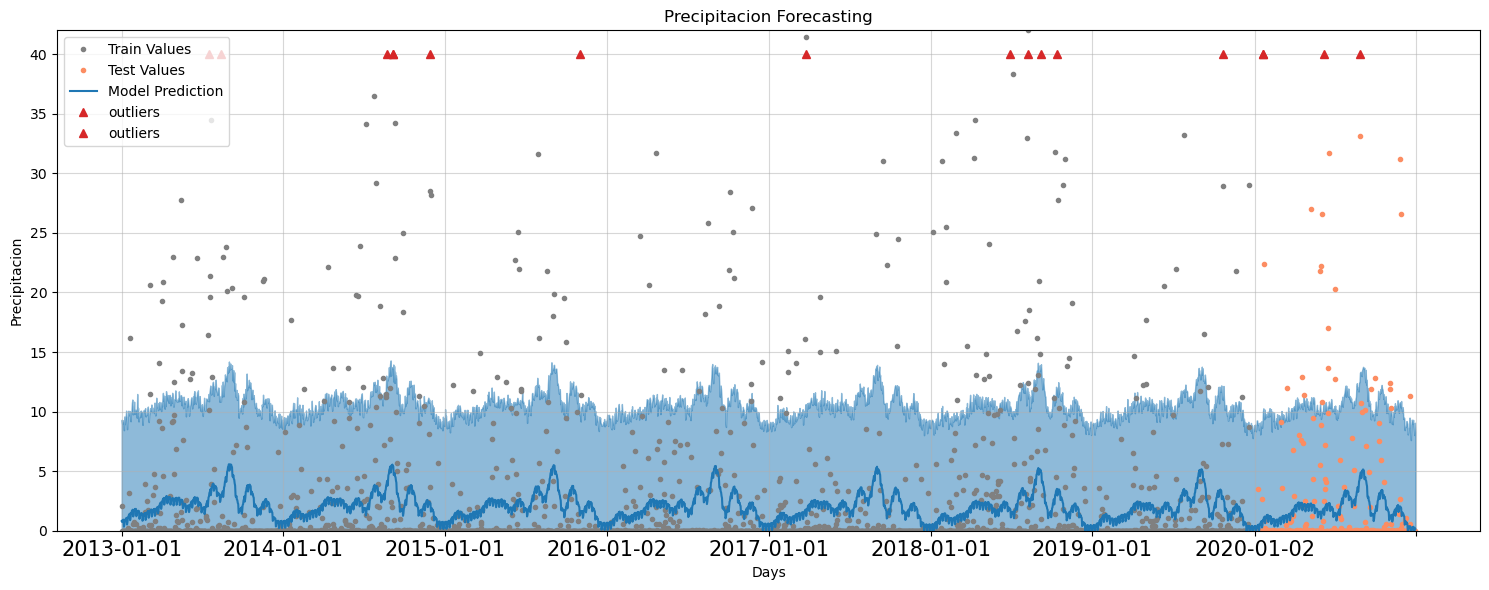

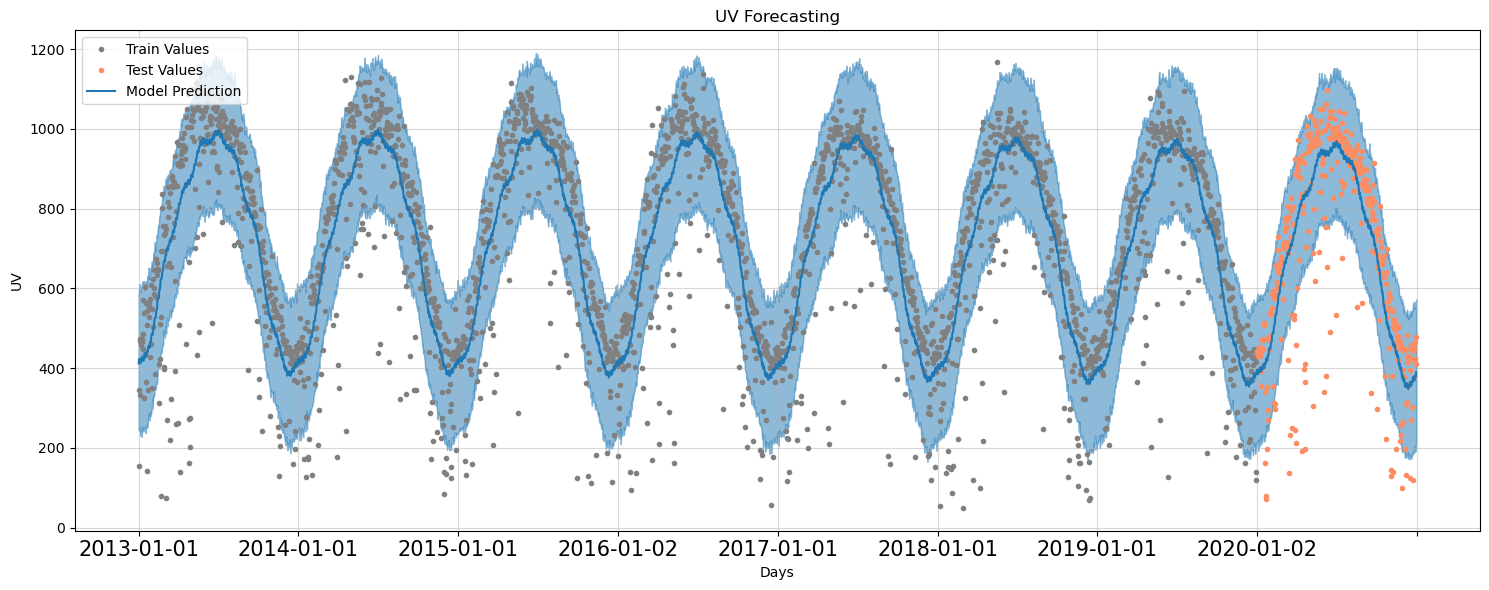

In [34]:
import matplotlib.dates as mdates
cmap = sns.color_palette('Set2')
for i in range(len(forecasts)):
    
    forecast_i = forecasts[i]
    true_data_i = true_data[i]
    df_codi_i = df_codis[i]
    end_date = true_data_i.ds.values[364]
    full_df = df_completo[(df_completo['sin_fecha'] >= '2013-01-01') & (df_completo['sin_fecha'] <= end_date)].sort_values('data')
    full_dates = full_df.sin_fecha.unique()
    
    yhat_list = forecast_i['yhat'].tolist()
    yhat_l_list = forecast_i['yhat_lower'].tolist()
    yhat_u_list = forecast_i['yhat_upper'].tolist()
    predicted = yhat_list
    predicted_l = yhat_l_list
    
    # Precipitación (codi35) tiene que ser ≥ 0
    if i == 5:
        predicted_l = np.array([np.max((0, l)) for l in predicted_l])
    predicted_u = yhat_u_list
    

    true_vals = true_data_i.y.values[:365]
    dates = full_dates 
    dates_predict = true_data_i.ds.values[:365]
    date_range = np.arange(len(dates))
    date_codis = df_codi_i.ds.values
    val_codis = df_codi_i.y.values

    fig = plt.figure(i, figsize=(15, 6))
    plt.grid(alpha = 0.5)
    plt.plot(date_codis, val_codis, '.', color = 'grey', alpha = 1, label = 'Train Values')

    plt.plot(dates_predict, true_vals, '.', color = cmap[1], alpha = 1, label = 'Test Values')
    plt.plot(dates, predicted, color = 'tab:blue', label = 'Model Prediction')
    plt.fill_between(dates, predicted_l, predicted_u, alpha = 0.5, color = 'tab:blue')
    plt.xlabel('Days')
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    #plt.xticks(rotation = 75)
    plt.xticks(fontsize = 15)
    if i == 5:
        extreme_limit = 40 # Change from 40 to something else if too low
        plt.ylim([0, extreme_limit + 1]) 
        extreme_vals_idx = np.argwhere(val_codis >= extreme_limit).flatten()
        extremes = extreme_limit * np.ones_like(extreme_vals_idx)
        plt.plot(date_codis[extreme_vals_idx], extremes, '^', color = 'tab:red', label = 'outliers')
        extreme_predicts_idx = np.argwhere(true_vals >= extreme_limit).flatten()
        extremes = extreme_limit * np.ones_like(extreme_predicts_idx)

        plt.plot(dates_predict[extreme_predicts_idx], extremes, '^', color = 'tab:red', label = 'outliers')



    plt.ylabel(ylabs[i])
    plt.title(titles[i])
    plt.legend(loc = 'upper left')
    plt.tight_layout()
    fig_name = codi_names[i]
    plt.savefig('./prediction_' + fig_name + '.png')

In [ ]:
end_date = true_data_i.ds.values[364]
full_df = df_completo[(df_completo['sin_fecha'] >= '2013-01-01') & (df_completo['sin_fecha'] <= end_date)].sort_values('data')
full_dates = full_df.sin_fecha.unique()


In [31]:
# Predictions
predictions = [forecast32_max_365, 
               forecast32_min_365, 
               forecast33_max_365, 
               forecast33_min_365, 
               forecast34_mean_365, 
               forecast35_sum_365, 
               forecast36_max_365] 
# Data real
true_data_list = [df_codi32_max_predict, 
                 df_codi32_min_predict, 
                 df_codi33_max_predict, 
                 df_codi33_min_predict, 
                 df_codi34_mean_predict, 
                 df_codi35_sum_predict, 
                 df_codi36_max_predict]

In [40]:
colnames = ['Time', 'MAE', 'MSE', 'RMSE', 'Correlation']
result_names = ['codi32_max', 'codi_32_min', 'codi33_max', 
                'codi_33_min', 'codi_34_mean', 'codi_35_sum', 
                'codi_36_max']
#for i, r in enumerate(results_list):
    #resultado = pd.DataFrame(r, columns = colnames)
    #resultado.to_csv('./resultados_tfm/resultados_' + result_names[i] + '.csv')

In [37]:
#Predictions and graphs
# Importa la función mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy.stats as stats

# Obtén las columnas 'ds', 'yhat' y 'valor' del DataFrame df_completo

yhat_list = forecast36_max_5['yhat'].tolist()
valor_list = df_completo['valor'].tolist()



# Imprime la lista de tuplas
#print(yhat_list)

forecast36_max_5['trend_redondeado'] = forecast36_max_5['trend'].round(1)
#ds_list = forecast36_max['ds_redondeado'].tolist()
#print(ds_list)

forecast36_max_5['yhat_redondeado'] = forecast36_max_5['yhat'].round(1)

#ds_list = forecast36_max['trend'].tolist()
#print(ds_list)


# Reseteamos los índices de los DataFrames para asegurarnos de que tengan la misma longitud
df_completo.reset_index(drop=True, inplace=True)
forecast36_max_5.reset_index(drop=True, inplace=True)


# Obtenemos las series de datos de 'valor' y 'yhat'
real_values = forecast36_max_5['trend_redondeado']
predicted_values = forecast36_max_5['yhat_redondeado']

# Calculamos el coeficiente de correlación de Pearson y su p-valor
correlation_coefficient, p_value = stats.pearsonr(real_values, predicted_values)

# Imprimimos el coeficiente de correlación y el p-valor
print("Coeficiente de correlación de Pearson:", correlation_coefficient)
print("P-valor:", p_value)


# Obtiene las series de datos de 'trend_redondeado' y 'yhat_redondeado'
real_values = forecast36_max_5['trend_redondeado']
predicted_values = forecast36_max_5['yhat_redondeado']

# Calcula el Error Cuadrático Medio (MSE)
mse = mean_squared_error(real_values, predicted_values)

# Imprime el MSE
print("Error Cuadrático Medio (MSE):", mse)


# Calcula el RMSE tomando la raíz cuadrada del MSE
rmse = mse ** 0.5

# Imprime el RMSE
print("Error Cuadrático Medio de la Raíz (RMSE):", rmse)



# Obtiene las series de datos de 'trend_redondeado' y 'yhat_redondeado'
real_values = forecast36_max_5['trend_redondeado']
predicted_values = forecast36_max_5['yhat_redondeado']

# Calcula el Error Absoluto Medio (MAE)
mae = mean_absolute_error(real_values, predicted_values)

# Imprime el MAE
print("Error Absoluto Medio (MAE):", mae)


Coeficiente de correlación de Pearson: 0.07223361872739824
P-valor: 0.000253722538155008
Error Cuadrático Medio (MSE): 43775.88702850449
Error Cuadrático Medio de la Raíz (RMSE): 209.22687931645993
Error Absoluto Medio (MAE): 186.64748145255757


In [38]:
import scipy as sp
time_vals = [5, 15, 30, 180, 365]
max_val = 365
results_list = []
for i in range(len(predictions)):
    results = np.zeros((len(time_vals), 5))
    results[:, 0] = time_vals
    prediction = predictions[i].loc[predictions[i]['ds'] >= '2020-01-01']
    truth = true_data_list[i]
    yhat_list = prediction['yhat'].tolist()
    valor_list = truth['y'].tolist()
    
    #truth['y_redondeado'] = truth['y'].round(1)
    #prediction['yhat_redondeado'] = prediction['yhat'].round(1)
    for j, tv in enumerate(time_vals):
        real_values = truth['y'].values[:tv]
        predicted_values = prediction['yhat'].values[:tv]
        correlation_coefficient, p_value = sp.stats.pearsonr(real_values, 
                                                      predicted_values)
        mse = mean_squared_error(real_values, predicted_values)
        rmse = mse ** 0.5
        mae = mean_absolute_error(real_values, predicted_values)
        
        results[j, 1] = mae
        results[j, 2] = mse
        results[j, 3] = rmse
        results[j, 4] = correlation_coefficient
        
    results_list.append(results)
    
        
    

/Users/jacobcurran-sebastian/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [216]:
correlations = np.zeros((len(predictions), 2))
for i in range(len(predictions)):
    results = np.zeros((len(time_vals), 5))
    results[:, 0] = time_vals
    prediction = predictions[i].loc[(predictions[i]['ds'] < '2020-01-01')  ]
    predicted_values = prediction['yhat'].values
    truth = df_codis[i]
    truth = truth.loc[(truth['ds'] < '2020-01-01')]
    real_values = truth['y'].values
    correlation_coefficient, p_value = sp.stats.pearsonr(real_values, 
                                                      predicted_values)
    correlations[i, 0] = correlation_coefficient
    correlations[i, 1] = p_value
    
    

In [222]:
np.round(correlations, 4)
correlation_df = pd.DataFrame(correlations[:, 0], index = codi_names, columns = ['Pearson Correlation'])

correlation_df.to_csv('./Pearson_correlation.csv')
